In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
%matplotlib inline

In [2]:
dados = pd.read_csv("dados_SP_modelo.csv", sep=',', low_memory=False)
dados

,Unnamed: 0,data,dias_epidemiológicos,mês,cod7d,cidade,munuf,casos_diários,casos_acumulados,mortes_diárias,mortes_acumuladas,habitantes,casos_por_100mil_hab,mortes_por_milhão_hab,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Total_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,Total_SUS,índice_isolamento
0,0,2020-02-26,1,2,3550308,São Paulo,São Paulo-SP,1,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
1,1,2020-02-27,2,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
2,2,2020-02-28,3,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
3,3,2020-02-29,4,2,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4777,5331,1068,917,657,675,13425,4279,3983,1286,1280,2805,789,14422,0.53000
4,4,2020-03-01,5,3,3550308,São Paulo,São Paulo-SP,0,1,0,0,12252023,0.00000,0.00000,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,15,Metropolitana de São Paulo,61,São Paulo,4611,5258,1031,920,476,649,12945,4279,5921,1288,1285,2805,789,16367,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,8536,2020-05-07,18,5,3542008,Quintana,Quintana-SP,0,2,0,0,6638,30.10000,0.00000,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,9,Marília,37,Tupã,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,8535,2020-05-07,40,5,3550407,São Pedro,São Pedro-SP,9,36,0,0,35653,101.00000,0.00000,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,6,Piracicaba,28,Piracicaba,12,4,4,2,0,0,22,20,36,8,2,0,0,66,0.53000
8792,8534,2020-05-07,21,5,3503109,Arandu,Arandu-SP,0,10,0,2,6357,157.30000,314.60000,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,4,Bauru,22,Avaré,0,0,0,0,0,0,0,3,5,4,0,0,0,12,0.53000
8793,8543,2020-05-07,36,5,3500501,Águas de Lindóia,Águas de Lindóia-SP,0,4,0,1,18705,21.40000,53.50000,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,7,Campinas,33,Amparo,1,7,2,2,0,0,12,3,15,6,6,0,0,30,0.53000


# 1. Feature Engineering

In [3]:
dados2 = dados.drop(columns=['Unnamed: 0', 'cod7d', 'cidade', 'casos_diários', 'mortes_diárias',
                             'casos_por_100mil_hab', 'mortes_por_milhão_hab',
                             'Microrregião Geográfica', 'Nome_Microrregião', 'Mesorregião Geográfica',
                             'Total_Não_SUS', 'Total_SUS'])
dados2

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,2020-05-07,18,5,Quintana-SP,2,0,6638,-22.07300,-50.30800,Tropical,meridiano 50 a 60,N,N,Interior,0.73200,Menor de 10 mil,Marília,0,0,0,0,0,0,0,0,0,0,0,0,0.53000
8791,2020-05-07,40,5,São Pedro-SP,36,0,35653,-22.54900,-47.91400,Tropical,meridiano 40 a 50,N,N,Interior,0.75500,Maior de 10 mil,Piracicaba,12,4,4,2,0,0,20,36,8,2,0,0,0.53000
8792,2020-05-07,21,5,Arandu-SP,10,2,6357,-23.13400,-49.05400,Tropical,meridiano 40 a 50,N,N,Interior,0.68500,Menor de 10 mil,Bauru,0,0,0,0,0,0,3,5,4,0,0,0,0.53000
8793,2020-05-07,36,5,Águas de Lindóia-SP,4,1,18705,-22.47600,-46.63300,Tropical,meridiano 40 a 50,N,N,Interior,0.74500,Maior de 10 mil,Campinas,1,7,2,2,0,0,3,15,6,6,0,0,0.53000


Foram excluídas as variáveis cod7d e cidade (ficando apenas com munuf para identificar o município), casos diários e casos por 100 mil habitantes (ficando apenas com casos acumulados), mortes diárias e mortes por milhão de habitantes (ficando apenas com casos acumulados), os totais de leitos SUS e Não SUS, o código da microrregião geográfica e seu nome (pois tem alta correlação com mesorregião geográfica e já temos o município como dado mais granular) e o código da mesorregião geográfica (ficando apenas com o nome da mesorregião).

In [4]:
dados2.isnull().sum()

data                             0
dias_epidemiológicos             0
mês                              0
munuf                            0
casos_acumulados                 0
mortes_acumuladas                0
habitantes                       0
lat                              0
lon                              0
zona geográfica                  0
faixa meridional                 0
capital                          0
litoral                          0
papel                            0
idhm_2010                        0
faixa_pop                        0
Nome_Mesorregião                 0
Cirúrgicos_Não_SUS               0
Clínicos_Não_SUS                 0
Obstétrico_Não_SUS               0
Pediátrico_Não_SUS               0
Outras_Especialidades_Não_SUS    0
Hospital/DIA_Não_SUS             0
Cirúrgicos_SUS                   0
Clínicos_SUS                     0
Obstétrico_SUS                   0
Pediátrico_SUS                   0
Outras_Especialidades_SUS        0
Hospital/DIA_SUS    

In [5]:
dados2.dtypes

data                              object
dias_epidemiológicos               int64
mês                                int64
munuf                             object
casos_acumulados                   int64
mortes_acumuladas                  int64
habitantes                         int64
lat                              float64
lon                              float64
zona geográfica                   object
faixa meridional                  object
capital                           object
litoral                           object
papel                             object
idhm_2010                        float64
faixa_pop                         object
Nome_Mesorregião                  object
Cirúrgicos_Não_SUS                 int64
Clínicos_Não_SUS                   int64
Obstétrico_Não_SUS                 int64
Pediátrico_Não_SUS                 int64
Outras_Especialidades_Não_SUS      int64
Hospital/DIA_Não_SUS               int64
Cirúrgicos_SUS                     int64
Clínicos_SUS    

In [6]:
dados2['data'] = pd.to_datetime(dados2['data'], errors='coerce', infer_datetime_format=True)
dados2.dtypes

data                             datetime64[ns]
dias_epidemiológicos                      int64
mês                                       int64
munuf                                    object
casos_acumulados                          int64
mortes_acumuladas                         int64
habitantes                                int64
lat                                     float64
lon                                     float64
zona geográfica                          object
faixa meridional                         object
capital                                  object
litoral                                  object
papel                                    object
idhm_2010                               float64
faixa_pop                                object
Nome_Mesorregião                         object
Cirúrgicos_Não_SUS                        int64
Clínicos_Não_SUS                          int64
Obstétrico_Não_SUS                        int64
Pediátrico_Não_SUS                      

In [7]:
dados2.nunique()

data                              72
dias_epidemiológicos              72
mês                                4
munuf                            383
casos_acumulados                 406
mortes_acumuladas                110
habitantes                       382
lat                              363
lon                              370
zona geográfica                    2
faixa meridional                   2
capital                            2
litoral                            2
papel                              3
idhm_2010                        129
faixa_pop                          4
Nome_Mesorregião                  15
Cirúrgicos_Não_SUS                76
Clínicos_Não_SUS                  90
Obstétrico_Não_SUS                48
Pediátrico_Não_SUS                46
Outras_Especialidades_Não_SUS     45
Hospital/DIA_Não_SUS              35
Cirúrgicos_SUS                    80
Clínicos_SUS                     117
Obstétrico_SUS                    55
Pediátrico_SUS                    57
O

In [8]:
dados2.head()

,data,dias_epidemiológicos,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


In [9]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento'],
      dtype='object')

## 1.1. Criar dia do ano

In [10]:
dados2['dia_do_ano'] = [n.dayofyear for n in dados2['data']]
colunas = ['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf', 'casos_acumulados',
       'mortes_acumuladas', 'habitantes', 'lat', 'lon', 'zona geográfica',
       'faixa meridional', 'capital', 'litoral', 'papel', 'idhm_2010',
       'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento']
dados2 = dados2.reindex(columns=colunas)
dados2.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,zona geográfica,faixa meridional,capital,litoral,papel,idhm_2010,faixa_pop,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,Subtropical,meridiano 40 a 50,S,N,Capital,0.80500,Maior de 100 mil,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000


## 1.2. Criar lags para casos e mortes acumulados

In [11]:
n = 1
radical = 'casos_acumulados_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['casos_acumulados'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [12]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

In [13]:
n = 1
radical = 'mortes_acumuladas_menos'
nome = '{}{}d'.format(radical, n)
while n < 15:
    dados2[nome] = dados2.groupby(['munuf'])['mortes_acumuladas'].shift(periods=n,axis='index',fill_value=0)
    n = n + 1
    nome = '{}{}d'.format(radical, n)

In [14]:
dados2.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'zona geográfica', 'faixa meridional', 'capital', 'litoral', 'papel',
       'idhm_2010', 'faixa_pop', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d

## 1.3. Criar dummies e label encoder para categóricas

In [15]:
dum = pd.get_dummies(dados2, 
                      columns=['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      drop_first=True, 
                      prefix = ['zona geográfica','faixa meridional','capital', 'litoral', 'papel', 'faixa_pop'],
                      prefix_sep='_')
dum.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le_tkt = le.fit_transform(dum['munuf'])
le_tkt_df1 = pd.DataFrame(le_tkt, columns=['LE_munuf'])

le_tkt = le.fit_transform(dum['Nome_Mesorregião'])
le_tkt_df2 = pd.DataFrame(le_tkt, columns=['LE_Nome_Mesorregião'],)

dados_tratados = pd.merge(dum,le_tkt_df1, left_index=True, right_index=True)
dados_tratados = pd.merge(dados_tratados,le_tkt_df2, left_index=True, right_index=True)

dados_tratados.head()

,data,dias_epidemiológicos,dia_do_ano,mês,munuf,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Nome_Mesorregião,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,2020-02-26,1,57,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2020-02-27,2,58,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,2020-02-28,3,59,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,2020-02-29,4,60,2,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,2020-03-01,5,61,3,São Paulo-SP,1,0,12252023,-23.54800,-46.63600,0.80500,Metropolitana de São Paulo,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


In [17]:
dados_tratados.columns

Index(['data', 'dias_epidemiológicos', 'dia_do_ano', 'mês', 'munuf',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Nome_Mesorregião', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_men

In [18]:
dados_sel = dados_tratados[['dias_epidemiológicos', 'dia_do_ano', 'mês',
       'casos_acumulados', 'mortes_acumuladas', 'habitantes', 'lat', 'lon',
       'idhm_2010', 'Cirúrgicos_Não_SUS',
       'Clínicos_Não_SUS', 'Obstétrico_Não_SUS', 'Pediátrico_Não_SUS',
       'Outras_Especialidades_Não_SUS', 'Hospital/DIA_Não_SUS',
       'Cirúrgicos_SUS', 'Clínicos_SUS', 'Obstétrico_SUS', 'Pediátrico_SUS',
       'Outras_Especialidades_SUS', 'Hospital/DIA_SUS', 'índice_isolamento',
       'casos_acumulados_menos1d', 'casos_acumulados_menos2d',
       'casos_acumulados_menos3d', 'casos_acumulados_menos4d',
       'casos_acumulados_menos5d', 'casos_acumulados_menos6d',
       'casos_acumulados_menos7d', 'casos_acumulados_menos8d',
       'casos_acumulados_menos9d', 'casos_acumulados_menos10d',
       'casos_acumulados_menos11d', 'casos_acumulados_menos12d',
       'casos_acumulados_menos13d', 'casos_acumulados_menos14d',
       'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d',
       'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d',
       'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d',
       'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d',
       'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d',
       'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d',
       'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d',
       'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60',
       'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana',
       'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil',
       'faixa_pop_Menor de 10 mil', 'LE_munuf', 'LE_Nome_Mesorregião']]

In [19]:
dados_sel.head()

,dias_epidemiológicos,dia_do_ano,mês,casos_acumulados,mortes_acumuladas,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,1,0,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,1,0,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9


## 1.4. Baseline e Validação

Vamos estabelecer que a base para comparação da previsão serão os casos e mortes do dia anterior. Ou seja, se prevíssemos que os casos e mortes de hoje serão iguais aos casos e mortes do dia anterior, o quanto estaríamos errando? O objetivo do modelo será superar esse erro médio.

#### Métricas para avaliar o modelo

Para analisar se as previsões estão com os valores próximos dos dados reais deve-se fazer a medição do erro, o erro (ou resíduo) neste caso é basicamente Yreal − Yprev.

Avalia-se o erro nos dados de treino para verificar se o modelo tem boa assertividade, e valida-se o modelo verificando o erro nos dados de teste (dados que não foram “vistos” pelo modelo).

Abaixo estão as principais métricas usadas para avaliar modelos de séries temporais:

##### Mean Forecast Error — (Erro Médio da Previsão ou Viés)

O erro médio da previsão nada mais é do que a média dos erros da série avaliada, os valores podem ser positivos ou negativos. Essa métrica sugere que o modelo tende a fazer previsões acima do real (erros negativos) ou abaixo do real (erros positivos), desse modo também pode-se dizer que o erro médio é o viés do modelo.

##### MAE — Mean Absolute Error — (Erro Médio Absoluto)

Essa métrica é muito semelhante ao erro médio da previsão mencionado acima, a única diferença é o erro com valor negativo, ou seja, a previsão com valor maior que o número real, é transformado em positivo e posteriormente a média é calculada.

Essa métrica é muito usada em séries temporais, pois há casos que o erro negativo pode zerar o positivo ou dar uma ideia que o modelo é preciso. No caso do MAE isso não acontece, pois essa métrica mostra o quanto a previsão está longe dos valores reais, independente se acima ou abaixo.

##### MSE — Mean Squared Error — (Erro Quadrático Médio)

Essa métrica coloca mais peso nos erros maiores, pois cada valor individual do erro é elevado ao quadrado e posteriormente a média desses valores é calculada. Assim, essa métrica é muito sensível à outliers e coloca bastante peso nas previsões com erros mais significativos.

Diferente do MAE e MFE, os valores do MSE estão em unidades quadráticas e não na unidade do modelo.

##### RMSE — Root Mean Squared Error — (Erro Quadrático Médio da Raiz)

Essa métrica é simplesmente a raiz quadrada do MSE, onde o erro volta a ter a unidade de medida do modelo. É muito usada em séries temporais porque é mais sensível à erros maiores devido ao processo de elevação ao quadrado que a originou.

##### MAPE — Mean Absolute Percentage Error — (Erro Percentual Médio Absoluto)

Essa é outra métrica interessante de ser usada, pois o erro é medido em termos percentuais e pode-se comparar o erro percentual do modelo de um objeto X com o erro percentual de um objeto Y. O cálculo dessa métrica pega o valor absoluto do erro dividido pelo resultado real e posteriormente é calculada a média.

In [20]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def check_erro(orig, prev, nome_col='', nome_indice=''):
    
    vies = np.mean(orig - prev)
    mse = mean_squared_error(orig, prev)
    rmse = sqrt(mean_squared_error(orig, prev))
    mae = mean_absolute_error(orig, prev)
    mape = np.mean(np.abs((orig - prev) / orig)) * 100
    
    grupo_erro = [vies, mse, rmse, mae, mape]
    serie = pd.DataFrame(grupo_erro, index=['VIÉS','MSE','RMSE','MAE', 'MAPE'], columns=[nome_col])
    serie.index.name = nome_indice
    
    return serie

### 1.4.1. Casos Acumulados

In [21]:
df_casos = dados_tratados[['data', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [22]:
df_casos.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos.rename(columns=colunas, inplace=True)
#df_casos = df_casos.iloc[1:]
df_casos

,real,previsão
data,,
2020-02-26,1,0
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,10


In [23]:
check_erro(df_casos['real'].values, df_casos['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,4.54008
MSE,2534.63900
RMSE,50.34520
MAE,4.65810
MAPE,11.77102


In [24]:
def plotar_erro(df, figsize=(18,8)):
    
    # Criando a coluna do erro
    df['Erro'] = df.iloc[:,0] - df.iloc[:,1]
    
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotando os valores reais e previstos
    ax1.plot(df.iloc[:,0:2])
    ax1.legend(['Real','Prev'])
    ax1.set_title('Valores Previstos vs Resíduo')
    
    # Erro vs Valores previstos
    ax2.scatter(df.iloc[:,1], df.iloc[:,2])
    ax2.set_xlabel('Valores Previstos')
    ax2.set_ylabel('Resíduo')
    ax2.set_title('Resíduo vs Valores Previstos')
    
    ## QQ Plot do erro
    sm.graphics.qqplot(df.iloc[:,2], line='r', ax=ax3)
    
    # Gráfico de autocorrelação do Erro
    plot_acf(df.iloc[:,2], lags=60,zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

C:\Users\gusta\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


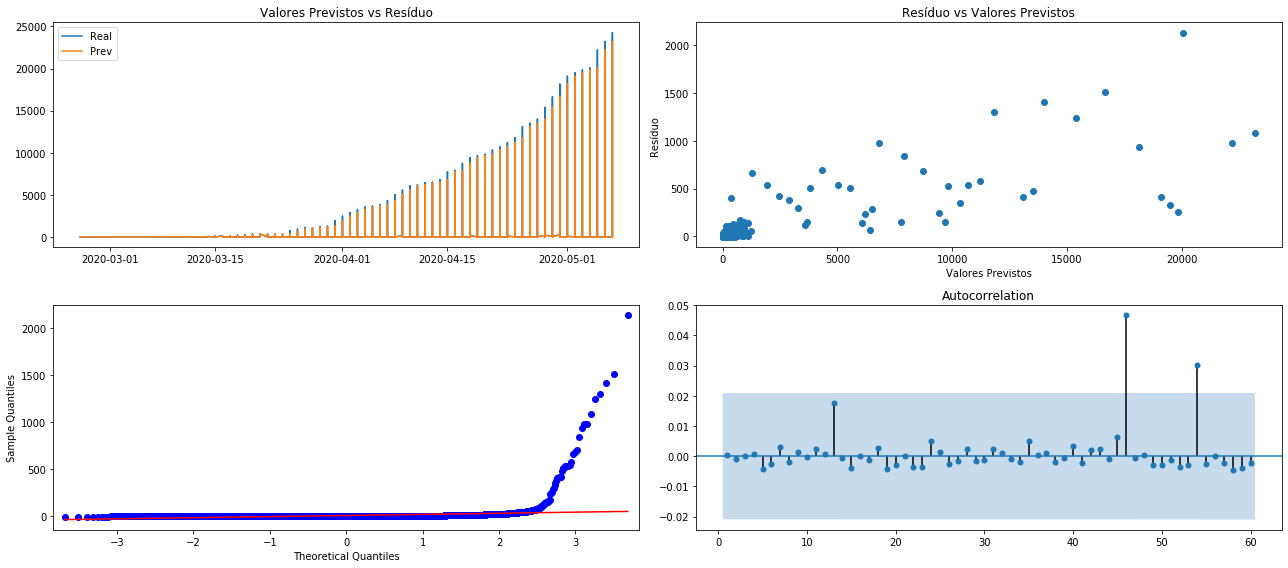

In [25]:
plotar_erro(df_casos)

### 1.4.2. Mortes Acumuladas

In [26]:
df_mortes = dados_tratados[['data', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [27]:
df_mortes.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes.rename(columns=colunas, inplace=True)
#df_mortes = df_mortes.iloc[1:]
df_mortes

,real,previsão
data,,
2020-02-26,0,0
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


In [28]:
check_erro(df_mortes['real'].values, df_mortes['previsão'], nome_col='Baseline', nome_indice='Base Completa')

,Baseline
Base Completa,
VIÉS,0.36453
MSE,21.03945
RMSE,4.58688
MAE,0.38204
MAPE,9.12069


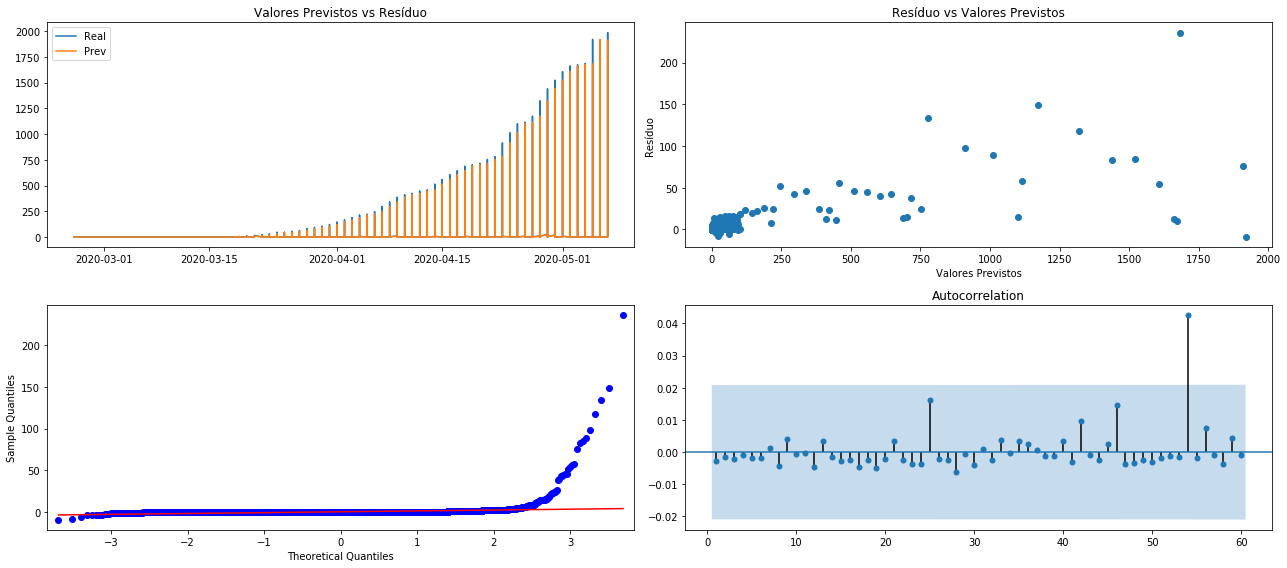

In [29]:
plotar_erro(df_mortes)

## 1.5. Separação da base em variáveis explicativas, target casos acumulados e target mortes acumuladas

In [30]:
pd.set_option('display.max_rows', 20)

In [31]:
explicativas = dados_sel.drop(columns=['casos_acumulados', 'mortes_acumuladas'])

In [32]:
explicativas.dtypes

dias_epidemiológicos            int64
dia_do_ano                      int64
mês                             int64
habitantes                      int64
lat                           float64
                               ...   
faixa_pop_Maior de 100 mil      uint8
faixa_pop_Maior de 50 mil       uint8
faixa_pop_Menor de 10 mil       uint8
LE_munuf                        int32
LE_Nome_Mesorregião             int32
Length: 59, dtype: object

In [33]:
target_casos = dados_sel['casos_acumulados']
target_mortes = dados_sel['mortes_acumuladas']

## 1.6. Modificação da distribuição das targets

Como a distribuição das targets está muito concentrada no zero, vamos aplicar uma função logarítmica para melhorar a performance do modelo.

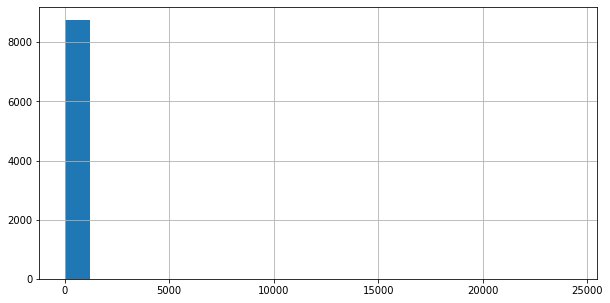

In [34]:
target_casos.hist(bins=20, figsize=(10,5))

In [35]:
target_casos_log = np.log1p(target_casos)

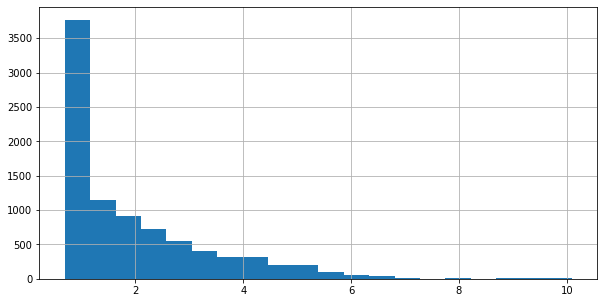

In [36]:
target_casos_log.hist(bins=20, figsize=(10,5))

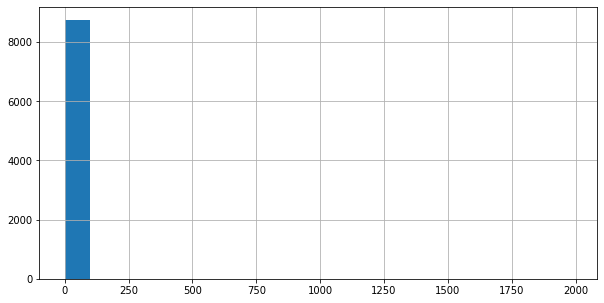

In [37]:
target_mortes.hist(bins=20, figsize=(10,5))

In [38]:
target_mortes_log = np.log1p(target_mortes)

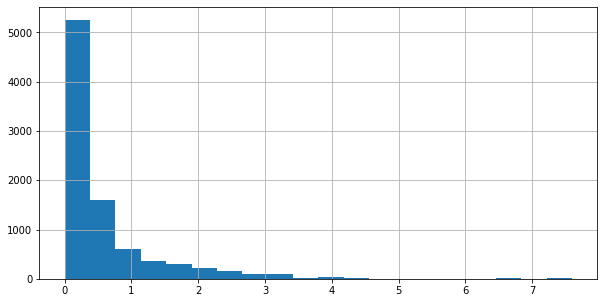

In [39]:
target_mortes_log.hist(bins=20, figsize=(10,5))

## 1.7. Seleção de Variáveis

### 1.7.1. Seleção baseada em filtro

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#### 1.7.1.1. Casos acumulados

In [41]:
chi_selector1 = SelectKBest(chi2, k=30)
chi_selector1.fit(explicativas.abs(), target_casos)
chi_support1 = chi_selector1.get_support()
chi_feature1 = explicativas.loc[:,chi_support1].columns.tolist()
print(str(len(chi_feature1)), 'é o numero de variáveis selecionadas')
print(chi_feature1)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


#### 1.7.1.2. Mortes acumuladas

In [42]:
chi_selector2 = SelectKBest(chi2, k=30)
chi_selector2.fit(explicativas.abs(), target_mortes)
chi_support2 = chi_selector2.get_support()
chi_feature2 = explicativas.loc[:,chi_support2].columns.tolist()
print(str(len(chi_feature2)), 'é o numero de variáveis selecionadas')
print(chi_feature2)

30 é o numero de variáveis selecionadas
['habitantes', 'Cirúrgicos_Não_SUS', 'Clínicos_Não_SUS', 'Cirúrgicos_SUS', 'Clínicos_SUS', 'Outras_Especialidades_SUS', 'casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d']


### 1.8.2. Seleção baseada em wrapper

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

#### 1.8.2.1. Casos acumulados

In [44]:
rfecv_selector1 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector1.fit(explicativas, target_casos_log)
rfecv_support1 = rfecv_selector1.get_support()
rfecv_feature1 = explicativas.loc[:,rfecv_support1].columns.tolist()
print(str(len(rfecv_feature1)), 'é o numero de variáveis selecionadas')
print(rfecv_feature1)

29 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'lat', 'lon', 'idhm_2010', 'Pediátrico_Não_SUS', 'Hospital/DIA_Não_SUS', 'Pediátrico_SUS', 'índice_isolamento', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil', 'faixa_pop_Menor de 10 mil']


#### 1.8.2.2. Mortes acumuladas

In [45]:
rfecv_selector2 = RFECV(estimator=LinearRegression(), step=10)
rfecv_selector2.fit(explicativas, target_mortes_log)
rfecv_support2 = rfecv_selector2.get_support()
rfecv_feature2 = explicativas.loc[:,rfecv_support2].columns.tolist()
print(str(len(rfecv_feature2)), 'é o numero de variáveis selecionadas')
print(rfecv_feature2)

19 é o numero de variáveis selecionadas
['dias_epidemiológicos', 'dia_do_ano', 'mês', 'idhm_2010', 'índice_isolamento', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d', 'zona geográfica_Tropical', 'faixa meridional_meridiano 50 a 60', 'capital_S', 'litoral_S', 'papel_Interior', 'papel_Metropolitana', 'faixa_pop_Maior de 100 mil', 'faixa_pop_Maior de 50 mil']


### 1.8.3. Seleção baseada em método embarcado

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#### 1.8.3.1. Casos acumulados

In [47]:
rf_selector1 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector1.fit(explicativas, target_casos)
rf_support1 = rf_selector1.get_support()
rf_feature1 = explicativas.loc[:,rf_support1].columns.tolist()
print(str(len(rf_feature1)), 'é o numero de variáveis selecionadas')
print(rf_feature1)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


#### 1.8.3.2. Mortes acumuladas

In [48]:
rf_selector2 = SelectFromModel(RandomForestRegressor(n_estimators=300, random_state=14))
rf_selector2.fit(explicativas, target_mortes)
rf_support2 = rf_selector2.get_support()
rf_feature2 = explicativas.loc[:,rf_support2].columns.tolist()
print(str(len(rf_feature2)), 'é o numero de variáveis selecionadas')
print(rf_feature2)

28 é o numero de variáveis selecionadas
['casos_acumulados_menos1d', 'casos_acumulados_menos2d', 'casos_acumulados_menos3d', 'casos_acumulados_menos4d', 'casos_acumulados_menos5d', 'casos_acumulados_menos6d', 'casos_acumulados_menos7d', 'casos_acumulados_menos8d', 'casos_acumulados_menos9d', 'casos_acumulados_menos10d', 'casos_acumulados_menos11d', 'casos_acumulados_menos12d', 'casos_acumulados_menos13d', 'casos_acumulados_menos14d', 'mortes_acumuladas_menos1d', 'mortes_acumuladas_menos2d', 'mortes_acumuladas_menos3d', 'mortes_acumuladas_menos4d', 'mortes_acumuladas_menos5d', 'mortes_acumuladas_menos6d', 'mortes_acumuladas_menos7d', 'mortes_acumuladas_menos8d', 'mortes_acumuladas_menos9d', 'mortes_acumuladas_menos10d', 'mortes_acumuladas_menos11d', 'mortes_acumuladas_menos12d', 'mortes_acumuladas_menos13d', 'mortes_acumuladas_menos14d']


### 1.8.4. Comparação dos diferentes métodos de seleção de variáveis

#### 1.8.4.1. Casos acumulados

In [49]:
pd.set_option('display.max_rows', None)
feature_selection_df = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support1, 'RFECV': rfecv_support1, 'RF':rf_support1})

#count
feature_selection_df['Total'] = np.sum(feature_selection_df,axis=1)

#print
feature_selection_df = feature_selection_df.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [50]:
feature_selection_df[feature_selection_df['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos9d,True,True,True,3
2,mortes_acumuladas_menos8d,True,True,True,3
3,mortes_acumuladas_menos7d,True,True,True,3
4,mortes_acumuladas_menos6d,True,True,True,3
5,mortes_acumuladas_menos5d,True,True,True,3
6,mortes_acumuladas_menos3d,True,True,True,3
7,mortes_acumuladas_menos2d,True,True,True,3
8,mortes_acumuladas_menos4d,True,False,True,2
9,mortes_acumuladas_menos1d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 53 variáveis selecionadas em pelo menos 1 método.

In [51]:
varcasos = feature_selection_df[feature_selection_df['Total']>0]['Variáveis'].to_list()

#### 1.8.4.2. Mortes acumuladas

In [52]:
feature_selection_df2 = pd.DataFrame({'Variáveis': explicativas.columns,
                                     'Chi-2':chi_support2, 'RFECV': rfecv_support2, 'RF':rf_support2})

#count
feature_selection_df2['Total'] = np.sum(feature_selection_df2,axis=1)

#print
feature_selection_df2 = feature_selection_df2.sort_values(['Total','Variáveis'],ascending=False)
feature_selection_df2.index = range(1, len(feature_selection_df2)+1)
feature_selection_df2

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


In [53]:
feature_selection_df2[feature_selection_df2['Total']>0]

,Variáveis,Chi-2,RFECV,RF,Total
1,mortes_acumuladas_menos8d,True,True,True,3
2,mortes_acumuladas_menos1d,True,True,True,3
3,mortes_acumuladas_menos9d,True,False,True,2
4,mortes_acumuladas_menos7d,True,False,True,2
5,mortes_acumuladas_menos6d,True,False,True,2
6,mortes_acumuladas_menos5d,True,False,True,2
7,mortes_acumuladas_menos4d,True,False,True,2
8,mortes_acumuladas_menos3d,True,False,True,2
9,mortes_acumuladas_menos2d,True,False,True,2
10,mortes_acumuladas_menos14d,False,True,True,2


Vamos utilizar as 47 variáveis selecionadas em pelo menos 1 método.

In [54]:
varmortes = feature_selection_df2[feature_selection_df2['Total']>0]['Variáveis'].to_list()

In [55]:
pd.set_option('display.max_rows', 20)

# 2. Elaboração de Modelos

Estudando as técnicas de modelagem de séries temporais, selecionamos 2 métodos diferentes:
* No primeiro, fazemos uma previsão em laço, ou seja, analisamos os dados do 1º período para prever o 2º, acrescentamos o 2º período ao 1º para prever o 3º e assim por diante. 
* No segundo, que chamaremos de previsão tradicional, dividiremos a base em teste e treino, sendo que a base teste será composta dos primeiros 80% da base e a base treino será composta dos últimos 20%, em ordem cronológica.

## 2.1. Método de Previsão em Laço

### 2.1.1. Árvore de Decisão

#### 2.1.1.1. Casos Acumulados

In [56]:
expl_casos = explicativas[varcasos]

In [57]:
expl_casos

,mortes_acumuladas_menos9d,mortes_acumuladas_menos8d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos4d,mortes_acumuladas_menos1d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,mortes_acumuladas_menos11d,lon,litoral_S,lat,idhm_2010,habitantes,faixa_pop_Menor de 10 mil,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Pediátrico_SUS,Pediátrico_Não_SUS,Outras_Especialidades_SUS,Hospital/DIA_Não_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,1,57,1,1280,917,2805,675,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,2,58,1,1280,917,2805,675,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,3,59,1,1280,917,2805,675,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,4,60,1,1280,917,2805,675,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,-46.63600,0,-23.54800,0.80500,12252023,0,0,1,0,5,61,1,1285,920,2805,649,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,-50.30800,0,-22.07300,0.73200,6638,1,0,0,1,18,128,0,0,0,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,-47.91400,0,-22.54900,0.75500,35653,0,0,0,0,40,128,0,2,2,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,2,-49.05400,0,-23.13400,0.68500,6357,1,0,0,0,21,128,0,0,0,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,1,-46.63300,0,-22.47600,0.74500,18705,0,0,0,0,36,128,0,6,2,0,0,15,7,3,1


In [58]:
df_casos_baseline_lasso = dados_tratados[['dia_do_ano', 'casos_acumulados', 'casos_acumulados_menos1d']].copy()

In [59]:
df_casos_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'casos_acumulados': 'real', 'casos_acumulados_menos1d': 'previsão'}
df_casos_baseline_lasso.rename(columns=colunas, inplace=True)
df_casos_baseline_lasso

,real,previsão
dia_do_ano,,
57,1,0
58,1,1
59,1,1
60,1,1
61,1,1
...,...,...
128,2,2
128,36,27
128,10,10


#### Sem modificação da distribuição das targets

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        tree.fit(xtr,ytr)

        #p = np.expm1(tree.predict(xts))
        p = tree.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 62 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 50.0
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 64 - Viés 1.0, MSE 1.0, RMSE 1.0, MAE 1.0, MAPE 33.33333333333333
Dia do ano 65 - Viés 3.0, MSE 9.0, RMSE 3.0, MAE 3.0, MAPE 50.0
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 68 - Viés 4.0, MSE 41.0, RMSE 6.4031242374328485, MAE 5.0, MAPE 80.0
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE 0.0
Dia do ano 70 - Viés 1.5, MSE 4.5, RMSE 2.1213203435596424, MAE 1.5, MAPE 8.333333333333332
Dia do ano 71 - Viés 6.0, MSE 72.0, RMSE 8.48528137423857, MAE 6.0, MAPE 20.0
Dia do ano 72 - Viés 4.666666666666667, M

Dia do ano 128 - Viés 1.9238845144356955, MSE 3275.824146981627, RMSE 57.23481586396192, MAE 6.2650918635170605, MAPE 20.059237831937786


* Sem modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [62]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [63]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [64]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [65]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [66]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,2
2020-05-07,36,27
2020-05-07,10,9


Text(0, 0.5, 'previsão')

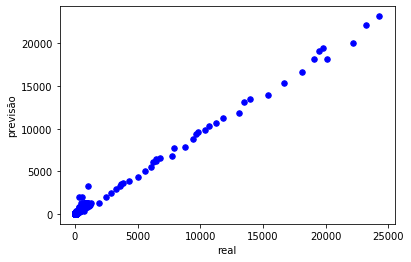

In [67]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [68]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,69.82943
std,818.10473,773.61676
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,4.00000
75%,13.00000,14.00000
max,24273.00000,23187.00000


Sem log1p
*  	real 	previsão
* count 	8794.00000 |	8794.00000
* mean 	71.08847 |	69.82943
* std 	818.10473 |	773.61676
* min 	1.00000 |	1.00000
* 25% 	1.00000 |	1.00000
* 50% 	3.00000 |	4.00000
* 75% 	13.00000 |	14.00000
* max 	24273.00000 |	23187.00000

In [69]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [70]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [71]:
erro_teste

,Baseline,Decision Tree ScikitLearn (laço)
Base Teste,,
VIÉS,4.54008,1.25904
MSE,2534.63900,4375.49875
RMSE,50.34520,66.14755
MAE,4.65810,6.74528
MAPE,11.77102,18.34111


sem log1p:
* Baseline 	Decision Tree ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	1.25904
* MSE 	2534.63900 	4375.49875
* RMSE 	50.34520 	66.14755
* MAE 	4.65810 	6.74528
* MAPE 	11.77102 	18.34111

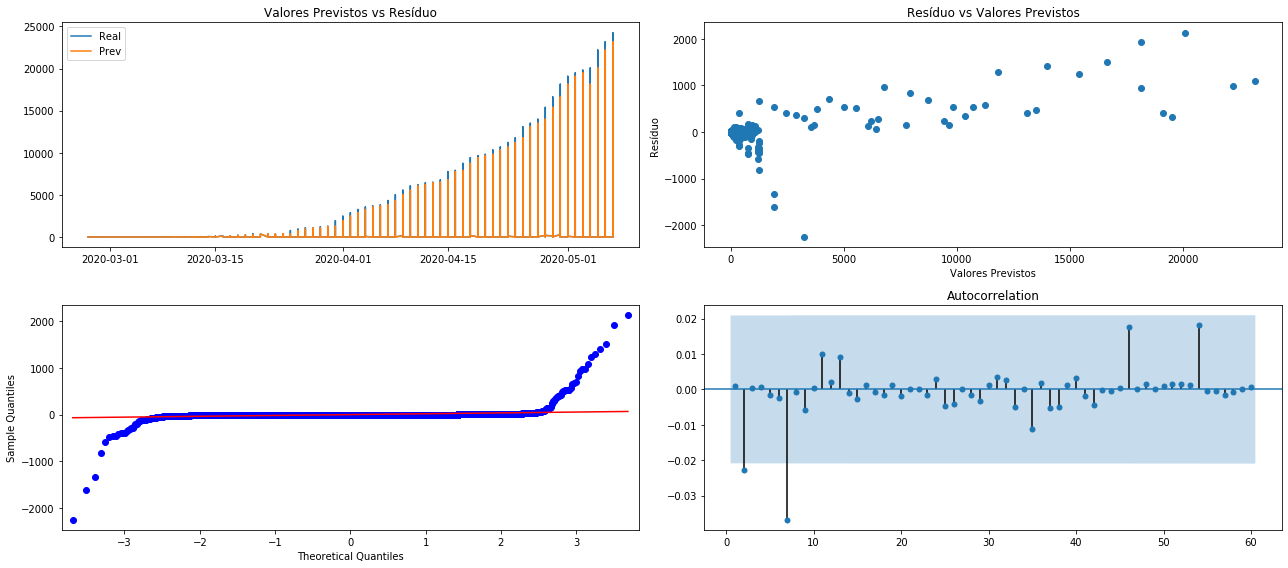

In [72]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com árvore de decisão sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão teve desempenho pouco pior que a baseline, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 6.7 casos, contra 4.6 casos na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [73]:
dia = 58
prev = {}
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_casos[explicativas['dia_do_ano'] < dia]
        val = expl_casos[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_casos_log[explicativas['dia_do_ano'] < dia].values, target_casos_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_casos[explicativas['dia_do_ano'] < dia].values, target_casos[explicativas['dia_do_ano'] == dia].values

        tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        tree.fit(xtr,ytr)

        p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
        
        prev.update({dia: p.round(decimals=0)})


        erro_teste['Baseline'] = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['real'].values,
                                            df_casos_baseline_lasso[df_casos_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
       
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

Dia do ano 58 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 59 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 60 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 61 - Viés -0.3068528194400547, MSE 0.09415865279831082, RMSE 0.3068528194400547, MAE 0.3068528194400547, MAPE 44.26950408889635
Dia do ano 62 - Viés 0.09861228866810978, MSE 0.009724383476362612, RMSE 0.09861228866810978, MAE 0.09861228866810978, MAPE 8.97607733731627
Dia do ano 63 - Viés -0.9013877113318907, MSE 0.8124998061401438, RMSE 0.9013877113318907, MAE 0.9013877113318907, MAPE 82.0478453253675
Dia do ano 64 - Viés -0.6137056388801099, MSE 0.3766346111932438, RMSE 0.6137056388801099, MAE 0.6137056388801099, MAPE 44.269504088896376
Dia do ano 65 - Viés -1.054

Dia do ano 119 - Viés -71.4806291716745, MSE 655339.3602314489, RMSE 809.5303331138673, MAE 71.51683541488543, MAPE 1040.8790573601975
Dia do ano 120 - Viés -83.18090125077245, MSE 779346.1839209077, RMSE 882.8058585673906, MAE 83.19929733020346, MAPE 1223.6366530943708
Dia do ano 121 - Viés -89.39389787478154, MSE 901602.1933407496, RMSE 949.5273526027303, MAE 89.39942753582837, MAPE 1290.341365840334
Dia do ano 122 - Viés -87.0582944345741, MSE 1006903.9015384029, RMSE 1003.4460132654884, MAE 87.07907273951983, MAPE 1251.2830180211824
Dia do ano 123 - Viés -93.18214367130005, MSE 1107601.8212680332, RMSE 1052.4266346249667, MAE 93.18214367130005, MAPE 1333.913012442564
Dia do ano 124 - Viés -93.13040237511235, MSE 1152138.5124763884, RMSE 1073.3771529506246, MAE 93.13040237511235, MAPE 1324.4375802628501
Dia do ano 125 - Viés -104.47850484577184, MSE 1216805.1462012, RMSE 1103.0889112855773, MAE 104.47968230593503, MAPE 1488.1456909786873
Dia do ano 126 - Viés -93.78661898357385, MSE

* Com modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [74]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [75]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred1 = pd.concat([dt,pt], axis=1, join='inner')

In [76]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [77]:
y_pred1 = pd.merge(y_pred1, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred1 = y_pred1.loc[y_pred1['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred1 = y_pred1.astype('int64')

In [78]:
df_casos_teste_lasso = dados_tratados[['data', 'casos_acumulados']][dados_tratados['dia_do_ano'] <= dia].copy()
df_casos_teste_lasso.drop([0], inplace=True)
df_casos_teste_lasso.set_index('data', inplace=True)
df_casos_teste_lasso = pd.concat([df_casos_teste_lasso,y_pred1], axis=1, join='inner')
colunas = {'casos_acumulados': 'real'}
df_casos_teste_lasso.rename(columns=colunas, inplace=True)
df_casos_teste_lasso

,real,previsão
data,,
2020-02-27,1,1
2020-02-28,1,1
2020-02-29,1,1
2020-03-01,1,1
2020-03-02,2,1
...,...,...
2020-05-07,2,4
2020-05-07,36,27
2020-05-07,10,9


Text(0, 0.5, 'previsão')

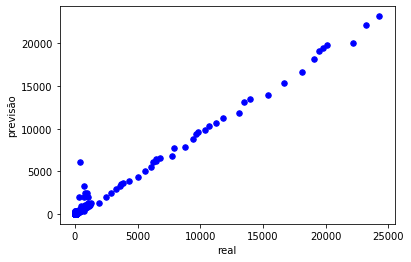

In [79]:
plt.scatter(df_casos_teste_lasso['real'], df_casos_teste_lasso['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [80]:
df_casos_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,71.08847,70.71117
std,818.10473,781.24312
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,13.00000,13.00000
max,24273.00000,23187.00000


Com log1p
*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	71.08847 	70.71117
* std 	818.10473 	781.24312
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	13.00000 	13.00000
* max 	24273.00000 	23187.00000

In [81]:
df_casos_teste_lasso[df_casos_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem casos negativos

In [82]:
erro_teste = check_erro(df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['real'].values,
                        df_casos_baseline_lasso[df_casos_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(df_casos_teste_lasso['real'],
                                                                df_casos_teste_lasso['previsão'])

In [83]:
erro_teste

,Baseline,Decision Tree ScikitLearn (laço)
Base Teste,,
VIÉS,4.54008,0.37730
MSE,2534.63900,8188.02024
RMSE,50.34520,90.48768
MAE,4.65810,7.48761
MAPE,11.77102,18.96010


Com log1p:
*  	Baseline 	Decision Tree ScikitLearn (laço)
* Base Teste 		
* VIÉS 	4.54008 	0.37730
* MSE 	2534.63900 	8188.02024
* RMSE 	50.34520 	90.48768
* MAE 	4.65810 	7.48761
* MAPE 	11.77102 	18.96010

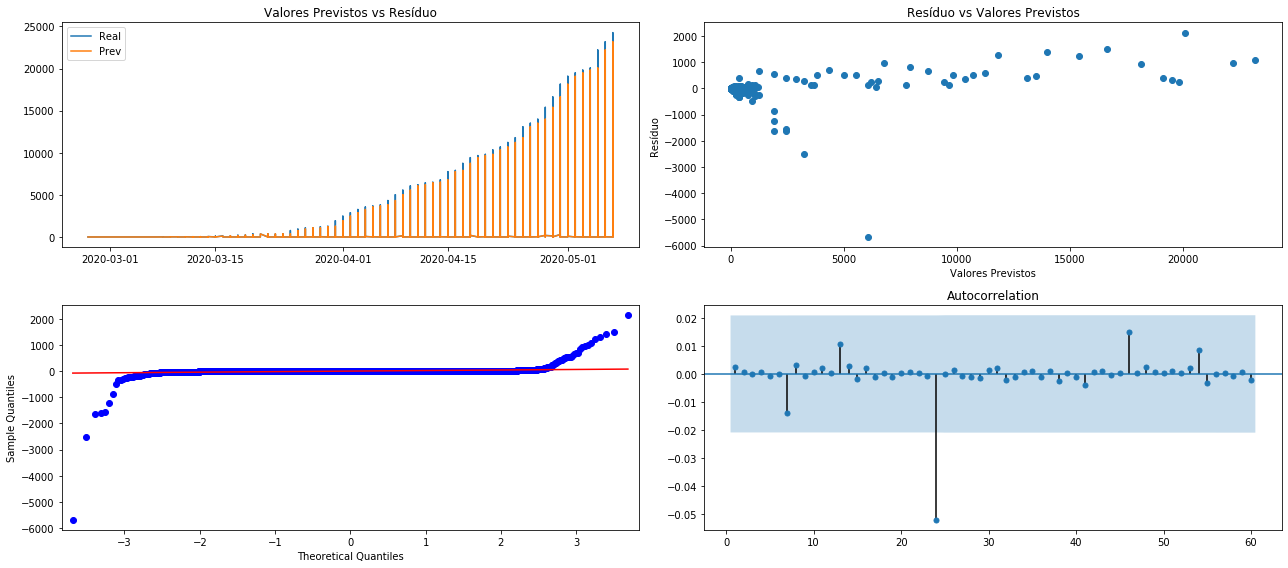

In [84]:
plotar_erro(df_casos_teste_lasso)

Conclusões:
* Com árvore de decisão com modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão teve desempenho pouco pior que a baseline, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 7.4 casos, contra 4.6 casos na baseline. Na comparação com a árvore sem modificação da target, a média das previsões ficou mais próxima da média real, o viés diminuiu, mas o erro absoluto aumentou, devido às previsões do início do gráfico de dispersão.

#### 2.1.1.2. Mortes Acumuladas

In [85]:
expl_mortes = explicativas[varmortes]

In [86]:
expl_mortes

,mortes_acumuladas_menos8d,mortes_acumuladas_menos1d,mortes_acumuladas_menos9d,mortes_acumuladas_menos7d,mortes_acumuladas_menos6d,mortes_acumuladas_menos5d,mortes_acumuladas_menos4d,mortes_acumuladas_menos3d,mortes_acumuladas_menos2d,mortes_acumuladas_menos14d,mortes_acumuladas_menos13d,mortes_acumuladas_menos12d,mortes_acumuladas_menos11d,mortes_acumuladas_menos10d,casos_acumulados_menos9d,casos_acumulados_menos8d,casos_acumulados_menos7d,casos_acumulados_menos6d,casos_acumulados_menos5d,casos_acumulados_menos4d,casos_acumulados_menos3d,casos_acumulados_menos2d,casos_acumulados_menos1d,casos_acumulados_menos14d,casos_acumulados_menos13d,casos_acumulados_menos12d,casos_acumulados_menos11d,casos_acumulados_menos10d,índice_isolamento,zona geográfica_Tropical,papel_Metropolitana,papel_Interior,mês,litoral_S,idhm_2010,habitantes,faixa_pop_Maior de 50 mil,faixa_pop_Maior de 100 mil,faixa meridional_meridiano 50 a 60,dias_epidemiológicos,dia_do_ano,capital_S,Outras_Especialidades_SUS,Clínicos_SUS,Clínicos_Não_SUS,Cirúrgicos_SUS,Cirúrgicos_Não_SUS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,1,57,1,2805,3983,5331,4279,4777
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,2,58,1,2805,3983,5331,4279,4777
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,3,59,1,2805,3983,5331,4279,4777
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0.53000,0,0,0,2,0,0.80500,12252023,0,1,0,4,60,1,2805,3983,5331,4279,4777
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0.53000,0,0,0,3,0,0.80500,12252023,0,1,0,5,61,1,2805,5921,5258,4279,4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0.53000,1,0,1,5,0,0.73200,6638,0,0,1,18,128,0,0,0,0,0,0
8791,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,17,24,26,26,26,28,27,1,1,1,1,1,0.53000,1,0,1,5,0,0.75500,35653,0,0,0,40,128,0,0,36,4,20,12
8792,2,2,2,2,2,2,2,2,2,2,2,2,2,2,9,9,9,10,10,10,10,10,10,9,9,9,9,9,0.53000,1,0,1,5,0,0.68500,6357,0,0,0,21,128,0,0,5,0,3,0
8793,1,1,1,1,1,1,1,1,1,1,1,1,1,1,5,4,4,4,4,4,4,4,4,2,2,2,2,3,0.53000,1,0,1,5,0,0.74500,18705,0,0,0,36,128,0,0,15,7,3,1


In [87]:
df_mortes_baseline_lasso = dados_tratados[['dia_do_ano', 'mortes_acumuladas', 'mortes_acumuladas_menos1d']].copy()

In [88]:
df_mortes_baseline_lasso.set_index('dia_do_ano', inplace=True)
colunas = {'mortes_acumuladas': 'real', 'mortes_acumuladas_menos1d': 'previsão'}
df_mortes_baseline_lasso.rename(columns=colunas, inplace=True)
df_mortes_baseline_lasso

,real,previsão
dia_do_ano,,
57,0,0
58,0,0
59,0,0
60,0,0
61,0,0
...,...,...
128,0,0
128,0,0
128,2,2


#### Sem modificação da distribuição das targets

In [89]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        #ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        tree.fit(xtr,ytr)

        #p = np.expm1(tree.predict(xts))
        p = tree.predict(xts)
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, M

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e


Dia do ano 83 - Viés 0.34782608695652173, MSE 2.782608695652174, RMSE 1.6681153124565982, MAE 0.34782608695652173, MAPE nan
Dia do ano 84 - Viés 0.6956521739130435, MSE 9.826086956521738, RMSE 3.134658985682771, MAE 0.6956521739130435, MAPE nan
Dia do ano 85 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 86 - Viés 0.3333333333333333, MSE 2.3333333333333335, RMSE 1.5275252316519468, MAE 0.3333333333333333, MAPE nan
Dia do ano 87 - Viés 0.23684210526315788, MSE 2.1842105263157894, RMSE 1.4779074823262075, MAE 0.2894736842105263, MAPE nan
Dia do ano 88 - Viés 0.39473684210526316, MSE 6.7631578947368425, RMSE 2.6006072165432523, MAE 0.4473684210526316, MAPE nan
Dia do ano 89 - Viés 0.2978723404255319, MSE 3.617021276595745, RMSE 1.9018468068158763, MAE 0.2978723404255319, MAPE nan
Dia do ano 90 - Viés 0.24489795918367346, MSE 2.5714285714285716, RMSE 1.6035674514745464, MAE 0.32653061224489793, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 91 - Viés 0.26865671641791045, MSE 4.925373134328358, RMSE 2.2193181687915677, MAE 0.3582089552238806, MAPE nan
Dia do ano 92 - Viés 0.3424657534246575, MSE 7.410958904109589, RMSE 2.722307643178777, MAE 0.4520547945205479, MAPE nan
Dia do ano 93 - Viés 0.23376623376623376, MSE 5.324675324675325, RMSE 2.3075258015188744, MAE 0.38961038961038963, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 94 - Viés 0.28735632183908044, MSE 5.758620689655173, RMSE 2.399712626473256, MAE 0.42528735632183906, MAPE nan
Dia do ano 95 - Viés 0.3541666666666667, MSE 7.354166666666667, RMSE 2.7118566825454966, MAE 0.4583333333333333, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 96 - Viés 0.10416666666666667, MSE 0.9375, RMSE 0.9682458365518543, MAE 0.2708333333333333, MAPE nan
Dia do ano 97 - Viés 0.2336448598130841, MSE 5.5233644859813085, RMSE 2.350183925989902, MAE 0.308411214953271, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 98 - Viés 0.44537815126050423, MSE 23.016806722689076, RMSE 4.797583425297478, MAE 0.6302521008403361, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés 0.2426470588235294, MSE 13.816176470588236, RMSE 3.7170117662698132, MAE 0.5220588235294118, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés -0.7361111111111112, MSE 107.63888888888889, RMSE 10.374916331657277, MAE 1.5972222222222223, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés 0.20394736842105263, MSE 4.151315789473684, RMSE 2.037477800976905, MAE 0.3618421052631579, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -0.15, MSE 4.1125, RMSE 2.027929979067325, MAE 0.3875, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -0.08024691358024691, MSE 4.993827160493828, RMSE 2.2346872623465295, MAE 0.41358024691358025, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés 0.05421686746987952, MSE 1.2228915662650603, RMSE 1.1058442775839012, MAE 0.25903614457831325, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés 0.3867403314917127, MSE 17.77900552486188, RMSE 4.216515803938351, MAE 0.574585635359116, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés 0.2828282828282828, MSE 11.353535353535353, RMSE 3.369500757313367, MAE 0.5252525252525253, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés 0.07729468599033816, MSE 14.173913043478262, RMSE 3.764825765354655, MAE 0.5314009661835749, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés 0.28888888888888886, MSE 7.737777777777778, RMSE 2.781686139336675, MAE 0.47555555555555556, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -0.01327433628318584, MSE 9.34070796460177, RMSE 3.056257182339498, MAE 0.5, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -0.11790393013100436, MSE 1.9694323144104804, RMSE 1.4033646405729625, MAE 0.37117903930131, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -0.18376068376068377, MSE 6.448717948717949, RMSE 2.539432603696729, MAE 0.3717948717948718, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -0.4, MSE 83.625, RMSE 9.144670579085941, MAE 0.925, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés 0.04132231404958678, MSE 2.9669421487603307, RMSE 1.7224813928633107, MAE 0.2809917355371901, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés 0.72265625, MSE 72.12890625, RMSE 8.492873851058897, MAE 0.93359375, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés 0.4253731343283582, MSE 37.23880597014925, RMSE 6.1023606883032775, MAE 0.746268656716418, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés 0.2375886524822695, MSE 29.5354609929078, RMSE 5.434653714166874, MAE 0.7269503546099291, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -0.10954063604240283, MSE 2.441696113074205, RMSE 1.562592753430722, MAE 0.3498233215547703, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés 0.3170731707317073, MSE 12.64459930313589, RMSE 3.5559245356356888, MAE 0.5052264808362369, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés 0.38870431893687707, MSE 77.42524916943522, RMSE 8.799161844711985, MAE 0.920265780730897, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés 0.38782051282051283, MSE 45.95192307692308, RMSE 6.778784778772894, MAE 0.7467948717948718, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés 0.11526479750778816, MSE 23.149532710280372, RMSE 4.8113961290129055, MAE 0.6199376947040498, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés 0.22424242424242424, MSE 23.13939393939394, RMSE 4.810342393156016, MAE 0.5575757575757576, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés 0.07207207207207207, MSE 9.777777777777779, RMSE 3.1269438398822866, MAE 0.4084084084084084, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -0.07507507507507508, MSE 2.033033033033033, RMSE 1.4258446735297057, MAE 0.2972972972972973, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -0.20597014925373133, MSE 3.4477611940298507, RMSE 1.856814797988709, MAE 0.35522388059701493, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés 0.8924418604651163, MSE 164.8168604651163, RMSE 12.838101902739217, MAE 1.2180232558139534, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -0.3261455525606469, MSE 3.6307277628032346, RMSE 1.9054468669588336, MAE 0.5040431266846361, MAPE nan
Dia do ano 128 - Viés -0.17060367454068243, MSE 29.493438320209975, RMSE 5.430786160420053, MAE 0.8110236220472441, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Sem modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [90]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [91]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [92]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [93]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [94]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,1
2020-05-07,2,2


Text(0, 0.5, 'previsão')

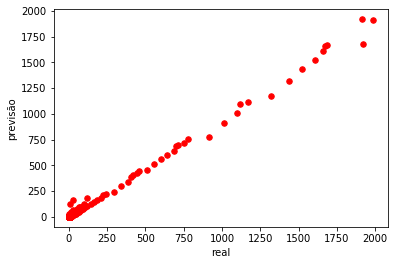

In [95]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [96]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.40675
std,67.05556,63.71190
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1919.00000


Sem log1p:

* 	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	5.40675
* std 	67.05556 	63.71190
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1919.00000

In [97]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [98]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [99]:
erro_teste

,Baseline,Regressão Linear ScikitLearn (lasso)
Base Teste,,
VIÉS,0.36453,0.12736
MSE,21.03945,26.14078
RMSE,4.58688,5.11281
MAE,0.38204,0.56811
MAPE,nan,inf


Sem log1p:
* Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.12736
* MSE 	21.03945 	26.14078
* RMSE 	4.58688 	5.11281
* MAE 	0.38204 	0.56811
* MAPE 	nan 	inf

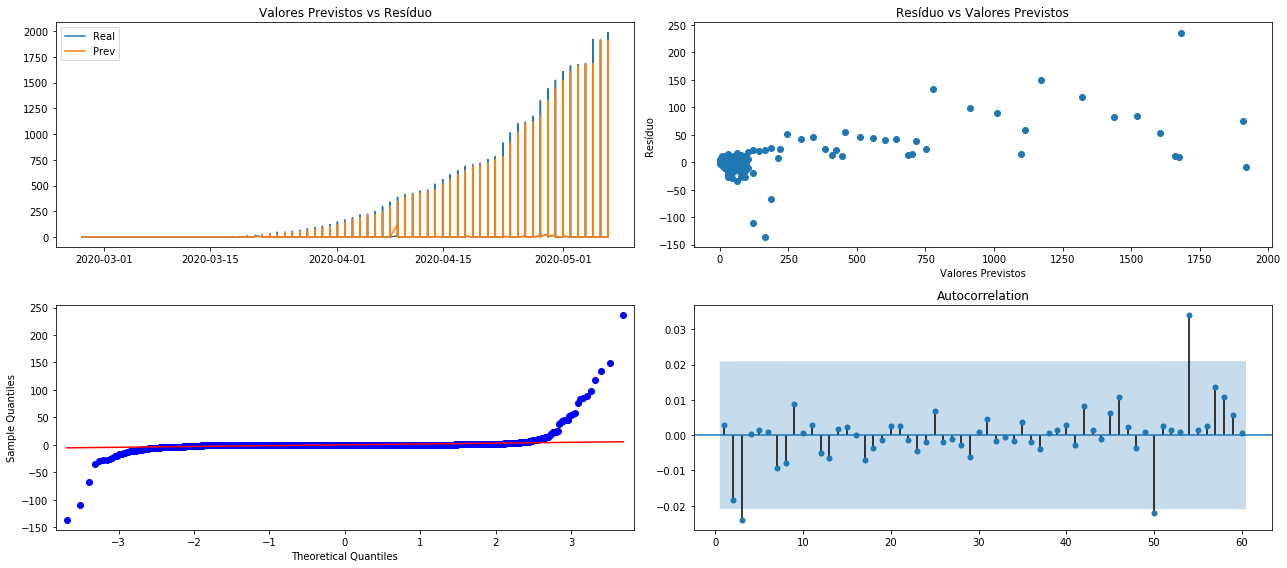

In [100]:
plotar_erro(df_mortes_teste_lasso)

Com árvore de decisão sem modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente.
Com a base teste, a árvore de decisão teve desempenho pouco pior que a baseline, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 0.56 mortes, contra 0.38 mortes na baseline (que apenas repete o resultado do dia anterior). 

#### Com modificação da distribuição das targets

In [101]:
dia = 58
prev = {}
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')

for dia in range(58,129):
    try:
        
        train = expl_mortes[explicativas['dia_do_ano'] < dia]
        val = expl_mortes[explicativas['dia_do_ano'] == dia]

        xtr, xts = train, val
        ytr, yts = target_mortes_log[explicativas['dia_do_ano'] < dia].values, target_mortes_log[explicativas['dia_do_ano'] == dia].values
        #ytr, yts = target_mortes[explicativas['dia_do_ano'] < dia].values, target_mortes[explicativas['dia_do_ano'] == dia].values

        tree = DecisionTreeRegressor(criterion='mae', random_state=14)
        tree.fit(xtr,ytr)

        p = np.expm1(tree.predict(xts))
        #p = tree.predict(xts)
      
        prev.update({dia: p.round(decimals=0)})

        
        erro_teste['Baseline'] = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['real'].values,
                                            df_mortes_baseline_lasso[df_mortes_baseline_lasso.index == dia]['previsão'].values)

        erro_teste['Decision Tree ScikitLearn (laço)'] = check_erro(yts, p)


        print('Dia do ano {} - Viés {}, MSE {}, RMSE {}, MAE {}, MAPE {}'.format(dia,
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[0],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[1],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[2],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[3],
                                                                                 erro_teste['Decision Tree ScikitLearn (laço)'].iloc[4]))
    except Exception as e:
    
        dia = dia - 1
        
                
        print("Erro no dia {}: {}".format(dia + 1, e))
        break

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e

Dia do ano 58 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 59 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 60 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 61 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 62 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 63 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 64 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 65 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 66 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 67 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 68 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 69 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 70 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 71 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 72 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, MAPE nan
Dia do ano 73 - Viés 0.0, MSE 0.0, RMSE 0.0, MAE 0.0, M

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value e


Dia do ano 82 - Viés -0.5158480775682978, MSE 6.120282500010896, RMSE 2.473920471642307, MAE 0.5158480775682978, MAPE nan
Dia do ano 83 - Viés -0.8072179476310807, MSE 14.986818744487884, RMSE 3.8712812794329325, MAE 0.8072179476310807, MAPE nan
Dia do ano 84 - Viés -1.1077483227369982, MSE 29.800889746412278, RMSE 5.4590191194400735, MAE 1.168021990611776, MAPE nan
Dia do ano 85 - Viés -1.3380068200951922, MSE 54.683062190699665, RMSE 7.394799672114159, MAE 1.3380068200951922, MAPE nan
Dia do ano 86 - Viés -1.0894466136813266, MSE 46.72039584114156, RMSE 6.835231952256014, MAE 1.2049711437746504, MAPE nan
Dia do ano 87 - Viés -1.3858700812182212, MSE 65.44849582839379, RMSE 8.090024464017015, MAE 1.3910602016744373, MAPE nan
Dia do ano 88 - Viés -1.616839987762583, MSE 90.47794150585828, RMSE 9.511989355852869, MAE 1.616839987762583, MAPE nan
Dia do ano 89 - Viés -1.6084297765093365, MSE 118.02062057501206, RMSE 10.86372958863631, MAE 1.6379254012140152, MAPE nan
Dia do ano 90 - Viés

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value


Dia do ano 92 - Viés -1.6794346987484856, MSE 184.53375185845812, RMSE 13.584320073469195, MAE 1.7529177460669574, MAPE nan
Dia do ano 93 - Viés -1.8844467228964643, MSE 250.6307527546047, RMSE 15.83132188904656, MAE 1.938458191511525, MAPE nan
Dia do ano 94 - Viés -1.883931732239539, MSE 289.85950921132405, RMSE 17.025260914632824, MAE 1.9818051890677642, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 95 - Viés -2.098952903785574, MSE 340.2898341119227, RMSE 18.446946471216386, MAE 2.1879612036307834, MAPE nan
Dia do ano 96 - Viés -2.3668751653762636, MSE 444.94483793229233, RMSE 21.093715602811475, MAE 2.399865143260766, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value

Dia do ano 97 - Viés -2.4238629137834837, MSE 432.0136783596497, RMSE 20.784938738414642, MAE 2.4482102986992604, MAPE nan
Dia do ano 98 - Viés -2.3064186857051143, MSE 478.0449193438306, RMSE 21.864238366424534, MAE 2.3864451187942577, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 99 - Viés -2.5119138372486454, MSE 619.9780668770943, RMSE 24.899358764375727, MAE 2.584717404198465, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 100 - Viés -3.0513493968625465, MSE 779.9518908712739, RMSE 27.927618782690264, MAE 3.1271093961592684, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 101 - Viés -2.9600562834347337, MSE 946.7276407001823, RMSE 30.768939544615154, MAE 3.0161832592976325, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 102 - Viés -3.095767632839088, MSE 1017.9864117099294, RMSE 31.90589932457522, MAE 3.1104933057184376, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 103 - Viés -3.112823730349319, MSE 1069.459973383648, RMSE 32.702598878126615, MAE 3.1299384755483297, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 104 - Viés -3.0464518964704075, MSE 1044.325557073263, RMSE 32.31602631935528, MAE 3.0655304378975896, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 105 - Viés -3.026516461462696, MSE 1120.8781429711132, RMSE 33.47951826073836, MAE 3.0821876093944103, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 106 - Viés -3.231098563492831, MSE 1295.5687950581214, RMSE 35.99401054422974, MAE 3.2729962112698403, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 107 - Viés -3.3658018602753597, MSE 1474.8552862958936, RMSE 38.40384468117605, MAE 3.391716171648541, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 108 - Viés -3.4099275832184226, MSE 1589.0327631636624, RMSE 39.86267380850992, MAE 3.4688855723714176, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 109 - Viés -3.9141327467878657, MSE 1806.259878523029, RMSE 42.500116217759086, MAE 3.919296631198982, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 110 - Viés -4.114417277814369, MSE 2029.3339117611301, RMSE 45.04812883751255, MAE 4.1309270748265625, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 111 - Viés -3.9967107980564953, MSE 2064.414381580466, RMSE 45.43582707050094, MAE 4.002635132933077, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 112 - Viés -4.400129272780965, MSE 2179.6143194126184, RMSE 46.68633975171558, MAE 4.409284375186533, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 113 - Viés -4.168763079922992, MSE 2312.552074936158, RMSE 48.08900160053396, MAE 4.185200964605341, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 114 - Viés -3.953653620891886, MSE 2332.804555449785, RMSE 48.299115472747374, MAE 4.043962317624534, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 115 - Viés -4.631213372491359, MSE 3076.9747444398836, RMSE 55.47048534527063, MAE 4.688174370847419, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 116 - Viés -4.999714722595235, MSE 3594.057330928501, RMSE 59.95045730374791, MAE 5.03628225396741, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 117 - Viés -6.086323385535303, MSE 4394.2383867366725, RMSE 66.28905178637474, MAE 6.086323385535303, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 118 - Viés -5.437088981540708, MSE 4187.7099366678385, RMSE 64.71251761960616, MAE 5.460026745579443, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 119 - Viés -5.753935552375503, MSE 4553.066265891846, RMSE 67.47641266318065, MAE 5.796041445489839, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 120 - Viés -6.311946622237998, MSE 5605.64325514544, RMSE 74.87084382552023, MAE 6.326540635821434, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 121 - Viés -6.644101374534959, MSE 6443.076571922235, RMSE 80.26877706756368, MAE 6.660198065740294, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 122 - Viés -6.511279628868187, MSE 6269.891470374026, RMSE 79.1826462703415, MAE 6.5250776053470725, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 123 - Viés -7.069045191502947, MSE 7749.812480588375, RMSE 88.0330192631627, MAE 7.069637457500954, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 124 - Viés -7.20419600579818, MSE 8286.063156466542, RMSE 91.02781528997905, MAE 7.217277410184654, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 125 - Viés -7.313649876085536, MSE 8354.159038271697, RMSE 91.40108882432253, MAE 7.313649876085536, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 126 - Viés -7.26589443083509, MSE 8244.656154048951, RMSE 90.80008895397047, MAE 7.302895956731883, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Dia do ano 127 - Viés -7.807326002043398, MSE 9947.468028351608, RMSE 99.7369942817188, MAE 7.816394094911992, MAPE nan
Dia do ano 128 - Viés -7.59258235158184, MSE 9606.487744494852, RMSE 98.01269175211368, MAE 7.62232958280096, MAPE nan


C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


* Com modificação das targets, a árvore de decisão conseguiu prever os 128 dias.

In [102]:
dt = []
pt = []
for k, i in prev.items():
    for a in i:
        dt.append(k)
        pt.append(a)        

In [103]:
dt = pd.DataFrame(data=dt, columns=['dia_do_ano'])
pt = pd.DataFrame(data=pt, columns=['previsão'])
y_pred2 = pd.concat([dt,pt], axis=1, join='inner')

In [104]:
proc_data = dados_tratados[['dia_do_ano', 'data']].copy()
proc_data.drop_duplicates(inplace=True)

In [105]:
y_pred2 = pd.merge(y_pred2, proc_data, how='left',
        left_on='dia_do_ano', right_on='dia_do_ano')
y_pred2 = y_pred2.loc[y_pred2['dia_do_ano'] <= dia].drop(columns='dia_do_ano').set_index('data')
y_pred2 = y_pred2.astype('int64')

In [106]:
df_mortes_teste_lasso = dados_tratados[['data', 'mortes_acumuladas']][dados_tratados['dia_do_ano'] <= dia].copy()
df_mortes_teste_lasso.drop([0], inplace=True)
df_mortes_teste_lasso.set_index('data', inplace=True)
df_mortes_teste_lasso = pd.concat([df_mortes_teste_lasso,y_pred2], axis=1, join='inner')
colunas = {'mortes_acumuladas': 'real'}
df_mortes_teste_lasso.rename(columns=colunas, inplace=True)
df_mortes_teste_lasso

,real,previsão
data,,
2020-02-27,0,0
2020-02-28,0,0
2020-02-29,0,0
2020-03-01,0,0
2020-03-02,0,0
...,...,...
2020-05-07,0,0
2020-05-07,0,0
2020-05-07,2,2


Text(0, 0.5, 'previsão')

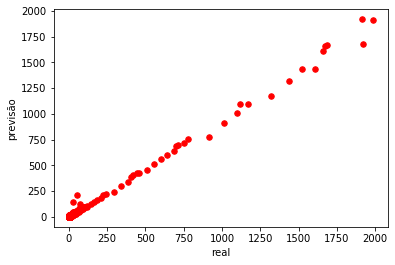

In [107]:
plt.scatter(df_mortes_teste_lasso['real'], df_mortes_teste_lasso['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [108]:
df_mortes_teste_lasso.describe()

,real,previsão
count,8794.00000,8794.00000
mean,5.53411,5.37901
std,67.05556,63.43911
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1986.00000,1919.00000


Com log1p:

*  	real 	previsão
* count 	8794.00000 	8794.00000
* mean 	5.53411 	5.37901
* std 	67.05556 	63.43911
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1986.00000 	1919.00000

In [109]:
df_mortes_teste_lasso[df_mortes_teste_lasso['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [110]:
erro_teste = check_erro(df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['real'].values,
                        df_mortes_baseline_lasso[df_mortes_baseline_lasso.index <= dia]['previsão'].values,
                        nome_col='Baseline',
                        nome_indice='Base Teste')
erro_teste['Regressão Linear ScikitLearn (lasso)'] = check_erro(df_mortes_teste_lasso['real'],
                                                                df_mortes_teste_lasso['previsão'])

C:\Users\gusta\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [111]:
erro_teste

,Baseline,Regressão Linear ScikitLearn (lasso)
Base Teste,,
VIÉS,0.36453,0.15511
MSE,21.03945,29.16375
RMSE,4.58688,5.40035
MAE,0.38204,0.56561
MAPE,nan,inf


Com log1p:
*  	Baseline 	Regressão Linear ScikitLearn (lasso)
* Base Teste 		
* VIÉS 	0.36453 	0.15511
* MSE 	21.03945 	29.16375
* RMSE 	4.58688 	5.40035
* MAE 	0.38204 	0.56561
* MAPE 	nan 	inf

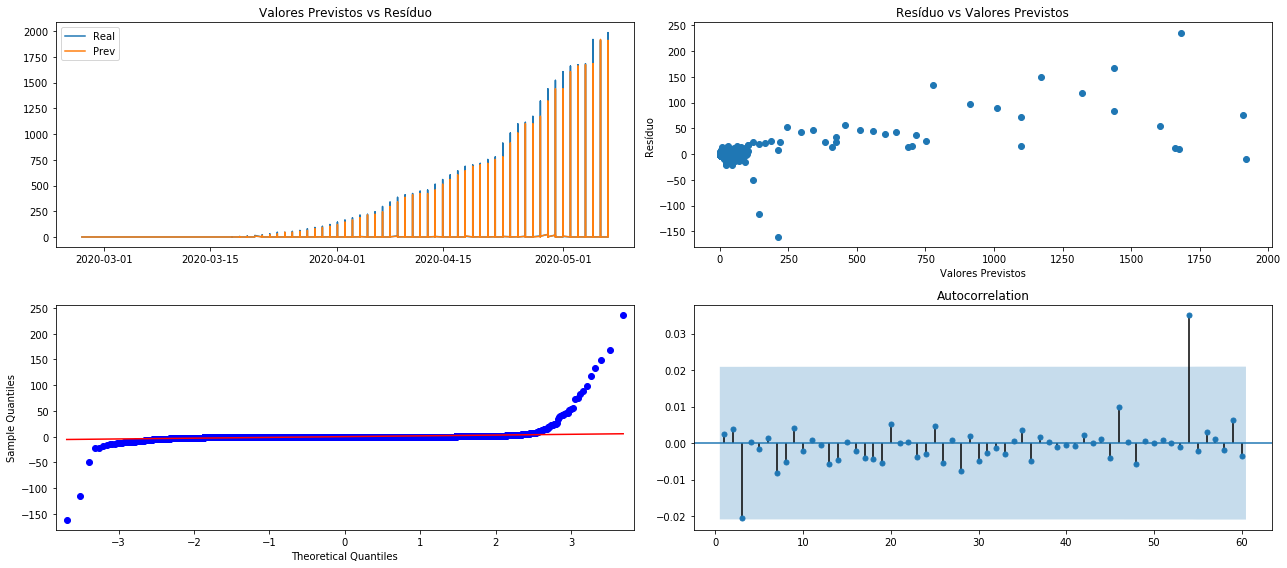

In [112]:
plotar_erro(df_mortes_teste_lasso)

* Com árvore de decisão com modificação da distribuição da target, o laço funcionou durante todos os 128 dias, com indicadores de erros aumentando gradativamente. Com a base teste, a árvore de decisão teve desempenho pouco pior que a baseline, mas muito melhor do que a regressão linear. O erro médio absoluto foi de 0.56 mortes, contra 0.38 mortes na baseline. Na comparação com a árvore sem modificação da target, a média das previsões ficou mais distante da média real, o viés aumentou, o erro absoluto diminuiu e o RMSE aumentou, devido às previsões do final do gráfico de dispersão.


## 2.2. Método de Previsão Tradicional

### 2.2.1. Separando as bases de teste e de treino

In [113]:
explicativas

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,18,128,5,6638,-22.07300,-50.30800,0.73200,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,2,2,2,2,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,278,8
8791,40,128,5,35653,-22.54900,-47.91400,0.75500,12,4,4,2,0,0,20,36,8,2,0,0,0.53000,27,28,26,26,26,24,17,6,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,341,10
8792,21,128,5,6357,-23.13400,-49.05400,0.68500,0,0,0,0,0,0,3,5,4,0,0,0,0.53000,10,10,10,10,10,10,9,9,9,9,9,9,9,9,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,1,0,0,0,1,14,3
8793,36,128,5,18705,-22.47600,-46.63300,0.74500,1,7,2,2,0,0,3,15,6,6,0,0,0.53000,4,4,4,4,4,4,4,4,5,3,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,380,4


In [114]:
len(explicativas)*0.8

7036.0

In [115]:
explicativas.iloc[7036]

dias_epidemiológicos             7.00000
dia_do_ano                     124.00000
mês                              5.00000
habitantes                   21496.00000
lat                            -21.35900
                                 ...    
faixa_pop_Maior de 100 mil       0.00000
faixa_pop_Maior de 50 mil        0.00000
faixa_pop_Menor de 10 mil        0.00000
LE_munuf                       269.00000
LE_Nome_Mesorregião             12.00000
Name: 7036, Length: 59, dtype: float64

In [116]:
explicativas[explicativas['dia_do_ano']<125]

,dias_epidemiológicos,dia_do_ano,mês,habitantes,lat,lon,idhm_2010,Cirúrgicos_Não_SUS,Clínicos_Não_SUS,Obstétrico_Não_SUS,Pediátrico_Não_SUS,Outras_Especialidades_Não_SUS,Hospital/DIA_Não_SUS,Cirúrgicos_SUS,Clínicos_SUS,Obstétrico_SUS,Pediátrico_SUS,Outras_Especialidades_SUS,Hospital/DIA_SUS,índice_isolamento,casos_acumulados_menos1d,casos_acumulados_menos2d,casos_acumulados_menos3d,casos_acumulados_menos4d,casos_acumulados_menos5d,casos_acumulados_menos6d,casos_acumulados_menos7d,casos_acumulados_menos8d,casos_acumulados_menos9d,casos_acumulados_menos10d,casos_acumulados_menos11d,casos_acumulados_menos12d,casos_acumulados_menos13d,casos_acumulados_menos14d,mortes_acumuladas_menos1d,mortes_acumuladas_menos2d,mortes_acumuladas_menos3d,mortes_acumuladas_menos4d,mortes_acumuladas_menos5d,mortes_acumuladas_menos6d,mortes_acumuladas_menos7d,mortes_acumuladas_menos8d,mortes_acumuladas_menos9d,mortes_acumuladas_menos10d,mortes_acumuladas_menos11d,mortes_acumuladas_menos12d,mortes_acumuladas_menos13d,mortes_acumuladas_menos14d,zona geográfica_Tropical,faixa meridional_meridiano 50 a 60,capital_S,litoral_S,papel_Interior,papel_Metropolitana,faixa_pop_Maior de 100 mil,faixa_pop_Maior de 50 mil,faixa_pop_Menor de 10 mil,LE_munuf,LE_Nome_Mesorregião
0,1,57,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
1,2,58,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
2,3,59,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
3,4,60,2,12252023,-23.54800,-46.63600,0.80500,4777,5331,1068,917,657,675,4279,3983,1286,1280,2805,789,0.53000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
4,5,61,3,12252023,-23.54800,-46.63600,0.80500,4611,5258,1031,920,476,649,4279,5921,1288,1285,2805,789,0.53000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,339,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,11,124,5,36305,-22.05900,-46.97900,0.71500,0,0,0,0,0,0,0,0,0,0,0,0,0.53000,14,14,15,13,13,1,1,1,1,0,0,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,4
7360,31,124,5,35292,-21.34000,-47.72900,0.75600,1,1,0,0,0,0,3,10,0,0,0,0,0.53000,8,8,8,8,8,8,8,8,8,7,7,7,6,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,87,12
7361,19,124,5,69116,-20.28400,-50.24600,0.79700,15,17,9,5,0,5,21,49,7,7,0,0,0.53000,10,10,10,9,9,9,8,8,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,107,13
7362,53,124,5,194276,-23.54100,-46.36900,0.73800,0,0,0,0,0,0,60,80,29,27,11,2,0.61000,103,98,98,95,86,75,74,67,62,60,59,58,55,56,6,6,6,6,5,3,3,3,3,3,3,3,2,2,0,0,0,0,0,1,1,0,0,108,9


#### 2.2.1.1. Casos acumulados

##### Sem modificação da distribuição target

In [117]:
x_treino1 = expl_casos[explicativas['dia_do_ano']<125]
x_teste1 = expl_casos[explicativas['dia_do_ano']>=125]
y_treino1 = target_casos[dados_sel['dia_do_ano']<125]
y_teste1 = target_casos[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [118]:
x_treino1.shape

(7364, 53)

In [119]:
y_treino1.shape

(7364,)

##### Com modificação da distribuição target

In [120]:
y_treino1log = target_casos_log[dados_sel['dia_do_ano']<125]
y_teste1log = target_casos_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino1), (len(x_treino1)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste1), (len(x_teste1)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [121]:
y_treino1log.shape

(7364,)

#### 2.2.1.2. Mortes acumuladas

##### Sem modificação da distribuição target

In [122]:
x_treino2 = expl_mortes[explicativas['dia_do_ano']<125]
x_teste2 = expl_mortes[explicativas['dia_do_ano']>=125]
y_treino2 = target_mortes[dados_sel['dia_do_ano']<125]
y_teste2 = target_mortes[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [123]:
x_treino2.shape

(7364, 47)

In [124]:
y_treino2.shape

(7364,)

##### Com modificação da distribuição target

In [125]:
y_treino2log = target_mortes_log[dados_sel['dia_do_ano']<125]
y_teste2log = target_mortes_log[dados_sel['dia_do_ano']>=125]
print('Numero de observaçoes para treino:{} ({}%)'.format(len(x_treino2), (len(x_treino2)/len(explicativas)*100)))
print('Numero de observaçoes para teste: {} ({}%)'.format(len(x_teste2), (len(x_teste2)/len(explicativas)*100)))

Numero de observaçoes para treino:7364 (83.72939169982945%)
Numero de observaçoes para teste: 1431 (16.27060830017055%)


In [126]:
y_treino2log.shape

(7364,)

### 2.2.2. Árvore de Decisão

#### 2.2.2.1. Casos Acumulados

##### Sem modificação da distribuição target

In [127]:
tree = DecisionTreeRegressor(criterion='mae', random_state=14)
tree.fit(x_treino1,y_treino1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=14, splitter='best')

In [128]:
y_pred1 = tree.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [129]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,14.00000
2020-05-03,8,8.00000
2020-05-03,10,10.00000


Text(0, 0.5, 'previsão')

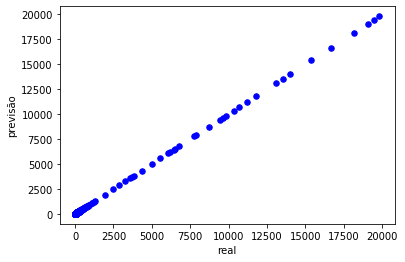

In [130]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [131]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,65.09791
std,723.44974,723.44974
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,19822.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	65.09791
* std 	723.44974 	723.44974
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	19822.00000

In [132]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [133]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.00000
MSE,2087.44337,0.00000
RMSE,45.68855,0.00000
MAE,4.41214,0.00000
MAPE,11.90706,0.00000


#### Erro Treino
*  	Baseline 	Árvore de Decisão Sem Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.00000
* MSE 	2087.44337 	0.00000
* RMSE 	45.68855 	0.00000
* MAE 	4.41214 	0.00000
* MAPE 	11.90706 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


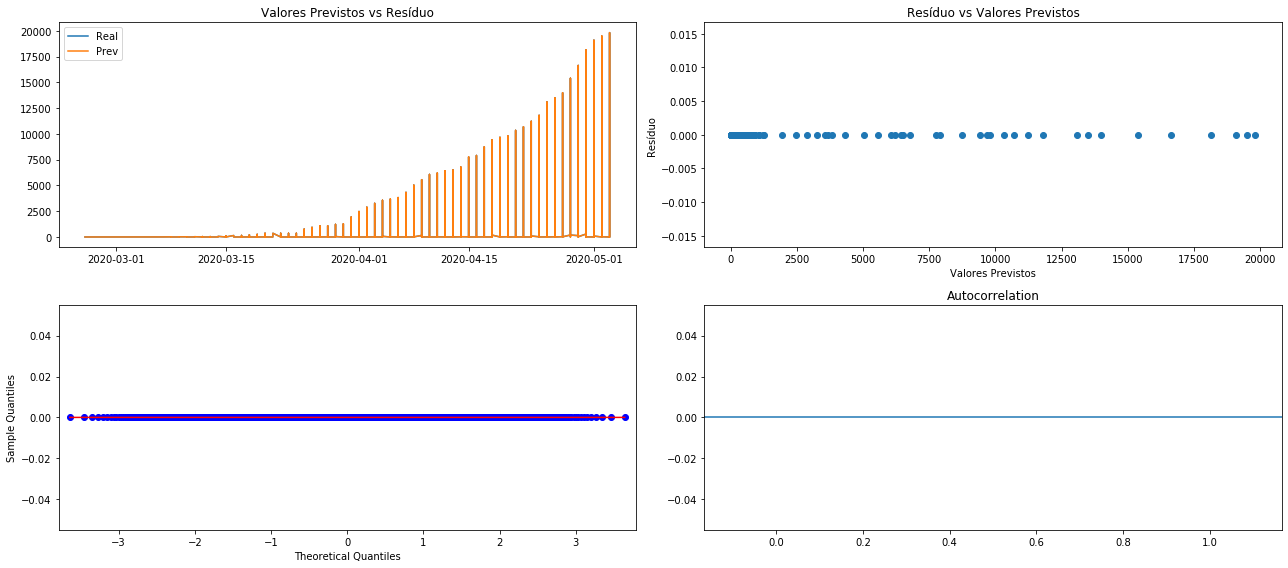

In [134]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a árvore de decisão sem modificação da distribuição target deu overfit total, com 0 erros.

In [135]:
y_pred2 = tree.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [136]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.00000
2020-05-04,1,1.00000
2020-05-04,236,248.00000
2020-05-04,14,14.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,27.00000
2020-05-07,10,10.00000


Text(0, 0.5, 'previsão')

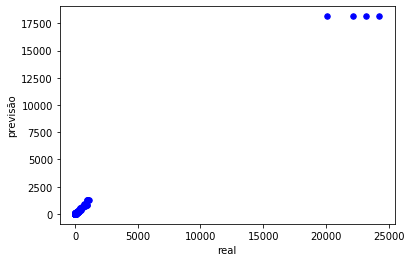

In [137]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [138]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,91.12509
std,1191.41907,964.54608
min,1.00000,1.00000
25%,2.00000,2.00000
50%,5.00000,5.00000
75%,19.00000,19.00000
max,24273.00000,18149.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	91.12509
* std 	1191.41907 	964.54608
* min 	1.00000 	1.00000
* 25% 	2.00000 	2.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	19.00000
* max 	24273.00000 	18149.00000

In [139]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [140]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,10.74214
MSE,4835.93082,58428.34801
RMSE,69.54086,241.71956
MAE,5.92383,16.42488
MAPE,11.07093,16.48049


#### Erro Teste
*  	Baseline 	Árvore de Decisão Sem Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	10.74214
* MSE 	4835.93082 	58428.34801
* RMSE 	69.54086 	241.71956
* MAE 	5.92383 	16.42488
* MAPE 	11.07093 	16.48049

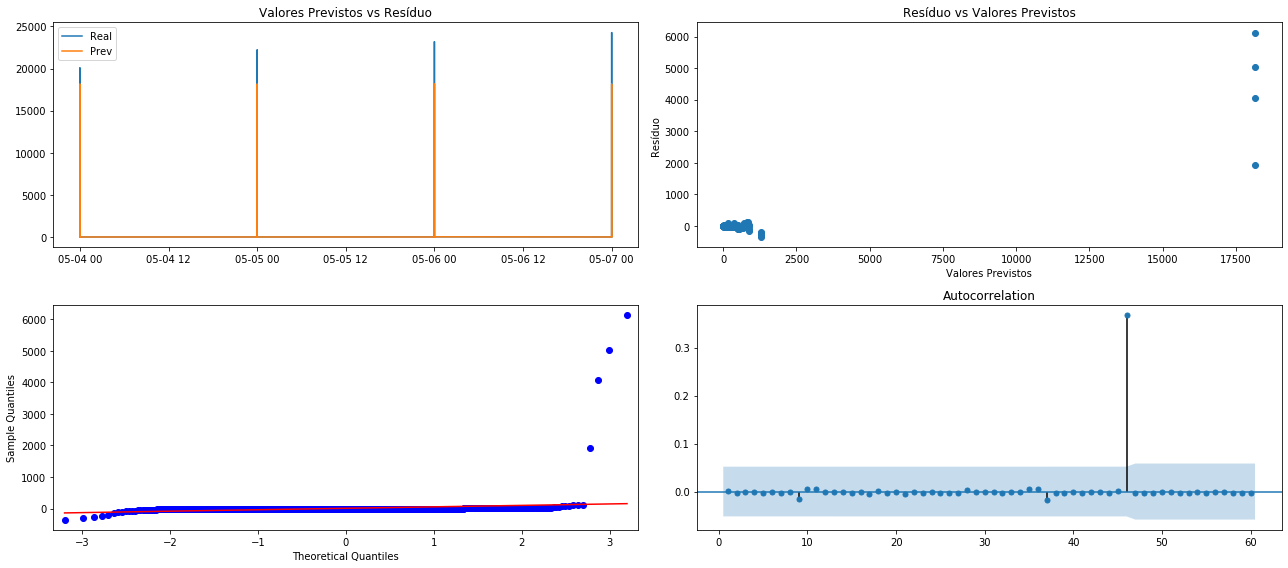

In [141]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a árvore de decisão sem modificação da distribuição target teve desempenho pior que a baseline. O erro médio absoluto foi de 16.4 casos, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [142]:
tree = DecisionTreeRegressor(criterion='mae', random_state=14)
tree.fit(x_treino1,y_treino1log)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=14, splitter='best')

In [143]:
y_pred1 = tree.predict(x_treino1)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [144]:
df_casos_TREE_treino = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_treino = df_casos_TREE_treino.iloc[0:7364]
df_casos_TREE_treino = pd.concat([df_casos_TREE_treino,y_pred1], axis=1, join='inner')
df_casos_TREE_treino.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_treino.rename(columns=colunas, inplace=True)
df_casos_TREE_treino

,real,previsão
data,,
2020-02-26,1,1.00000
2020-02-27,1,1.00000
2020-02-28,1,1.00000
2020-02-29,1,1.00000
2020-03-01,1,1.00000
...,...,...
2020-05-03,14,14.00000
2020-05-03,8,8.00000
2020-05-03,10,10.00000


Text(0, 0.5, 'previsão')

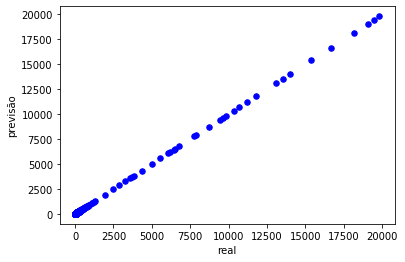

In [145]:
plt.scatter(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [146]:
df_casos_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,65.09791,65.09791
std,723.44974,723.44974
min,1.00000,1.00000
25%,1.00000,1.00000
50%,3.00000,3.00000
75%,11.00000,11.00000
max,19822.00000,19822.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	65.09791 	65.09791
* std 	723.44974 	723.44974
* min 	1.00000 	1.00000
* 25% 	1.00000 	1.00000
* 50% 	3.00000 	3.00000
* 75% 	11.00000 	11.00000
* max 	19822.00000 	19822.00000

In [147]:
df_casos_TREE_treino[df_casos_TREE_treino['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [148]:
df_casos_baseline_treino = df_casos.iloc[0:7364]
erro_treino = check_erro(df_casos_baseline_treino['real'].values,
                         df_casos_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_treino['real'], df_casos_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Treino,,
VIÉS,4.31545,0.00000
MSE,2087.44337,0.00000
RMSE,45.68855,0.00000
MAE,4.41214,0.00000
MAPE,11.90706,0.00000


#### Erro Treino
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	4.31545 	0.00000
* MSE 	2087.44337 	0.00000
* RMSE 	45.68855 	0.00000
* MAE 	4.41214 	0.00000
* MAPE 	11.90706 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


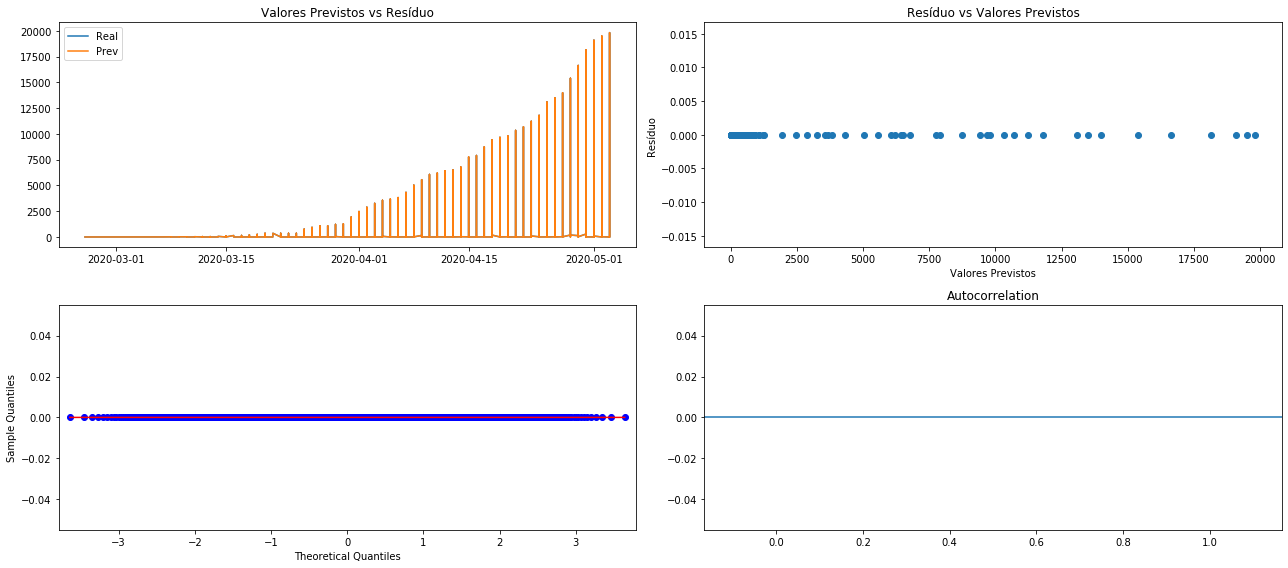

In [149]:
plotar_erro(df_casos_TREE_treino)

Com a base treino, a árvore de decisão com modificação da distribuição target deu overfit total, com 0 erros.

In [150]:
y_pred2 = tree.predict(x_teste1)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [151]:
df_casos_TREE_teste = dados_tratados[['data', 'casos_acumulados']].copy()
df_casos_TREE_teste = df_casos_TREE_teste.iloc[7364:]
df_casos_TREE_teste.reset_index(drop=True, inplace=True)
df_casos_TREE_teste = pd.concat([df_casos_TREE_teste,y_pred2], axis=1, join='inner')
df_casos_TREE_teste.set_index('data', inplace=True)
colunas = {'casos_acumulados': 'real'}
df_casos_TREE_teste.rename(columns=colunas, inplace=True)
df_casos_TREE_teste

,real,previsão
data,,
2020-05-04,4,4.00000
2020-05-04,1,1.00000
2020-05-04,236,246.00000
2020-05-04,14,14.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,2,2.00000
2020-05-07,36,33.00000
2020-05-07,10,10.00000


Text(0, 0.5, 'previsão')

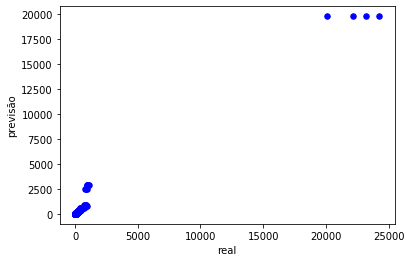

In [152]:
plt.scatter(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'], s = 30, c = 'blue')
plt.xlabel("real")
plt.ylabel("previsão")

In [153]:
df_casos_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,101.86723,104.63871
std,1191.41907,1067.78486
min,1.00000,1.00000
25%,2.00000,1.00000
50%,5.00000,5.00000
75%,19.00000,20.00000
max,24273.00000,19822.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	101.86723 	104.63871
* std 	1191.41907 	1067.78486
* min 	1.00000 	1.00000
* 25% 	2.00000 	1.00000
* 50% 	5.00000 	5.00000
* 75% 	19.00000 	20.00000
* max 	24273.00000 	19822.00000

In [154]:
df_casos_TREE_teste[df_casos_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas

In [155]:
df_casos_baseline_teste = df_casos.iloc[7364:]
erro_teste = check_erro(df_casos_baseline_teste['real'].values,
                         df_casos_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_casos_TREE_teste['real'], df_casos_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Teste,,
VIÉS,5.69602,-2.77149
MSE,4835.93082,43586.11461
RMSE,69.54086,208.77288
MAE,5.92383,20.59259
MAPE,11.07093,16.46912


#### Erro Teste
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	5.69602 	-2.77149
* MSE 	4835.93082 	43586.11461
* RMSE 	69.54086 	208.77288
* MAE 	5.92383 	20.59259
* MAPE 	11.07093 	16.46912

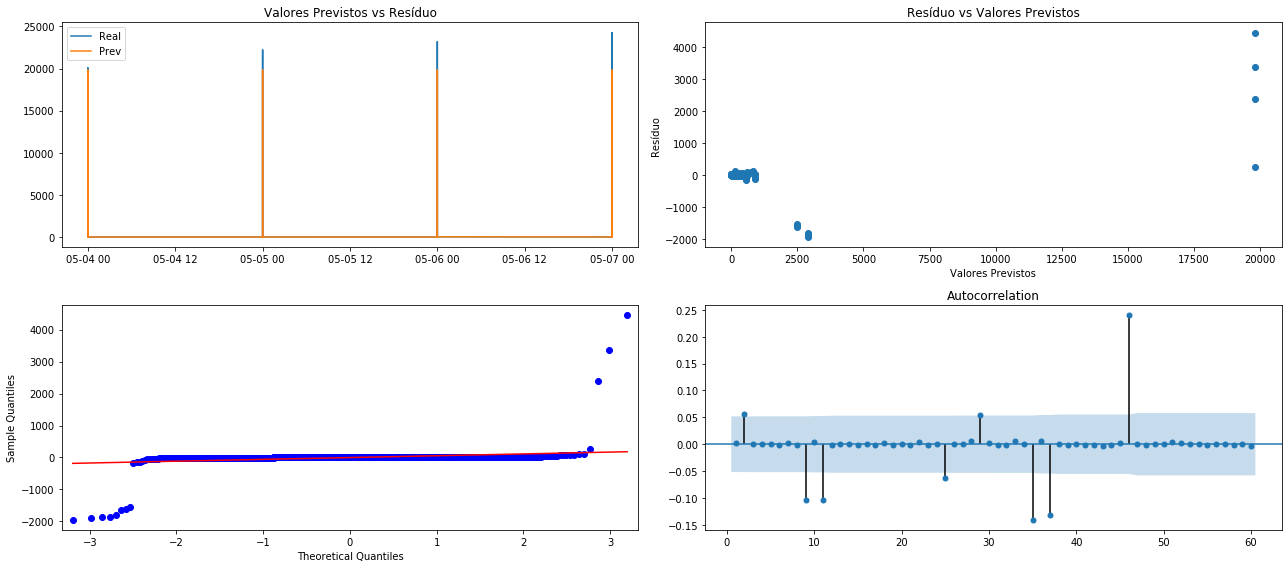

In [156]:
plotar_erro(df_casos_TREE_teste)

Com a base teste, a árvore de decisão com modificação da distribuição target teve desempenho pior que a baseline. O erro médio absoluto foi de 20.5 casos, contra 5.9 casos na baseline (que apenas repete o resultado do dia anterior). Em comparação com a árvore sem modificação da distribuição target, vemos que o erro médio absoluto subiu 4 pontos (por causa dos erros no 2º e 3º quartis), mas diminuiu o RMSE em mais de 30 pontos (aproximando as previsões maiores do real).

#### 2.2.2.2. Mortes Acumuladas

##### Sem modificação da distribuição target

In [157]:
tree = DecisionTreeRegressor(criterion='mae', random_state=14)
tree.fit(x_treino2,y_treino2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=14, splitter='best')

In [158]:
y_pred1 = tree.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])

In [159]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

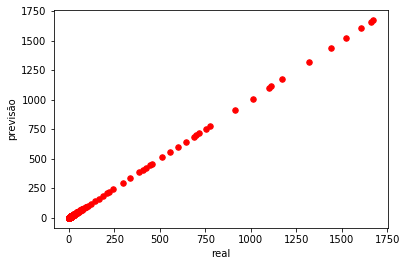

In [160]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [161]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.98669
std,58.68772,58.68772
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,1673.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.98669
* std 	58.68772 	58.68772
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	1673.00000

In [162]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [163]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.00000
MSE,16.43061,0.00000
RMSE,4.05347,0.00000
MAE,0.36353,0.00000
MAPE,9.64655,0.00000


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Treino 		
* VIÉS 	0.35646 	0.00000
* MSE 	16.43061 	0.00000
* RMSE 	4.05347 	0.00000
* MAE 	0.36353 	0.00000
* MAPE 	9.64655 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


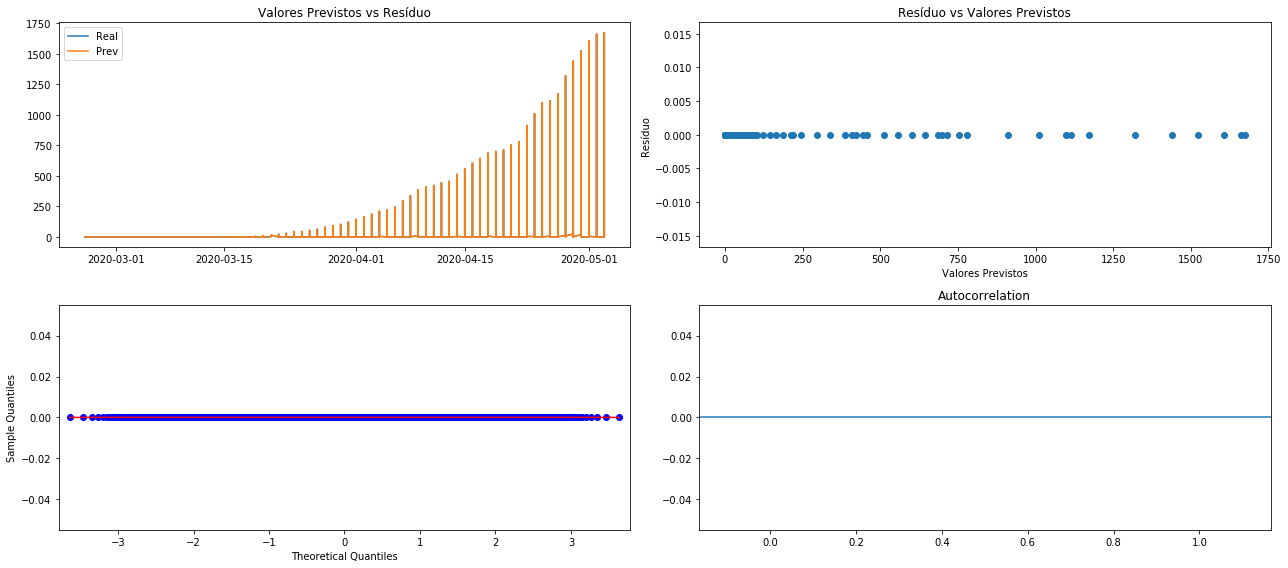

In [164]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a árvore de decisão sem modificação da distribuição target deu overfit total, com 0 erros.

In [165]:
y_pred2 = tree.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])

In [166]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,15.00000
2020-05-04,3,3.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,4.00000
2020-05-07,2,2.00000


Text(0, 0.5, 'previsão')

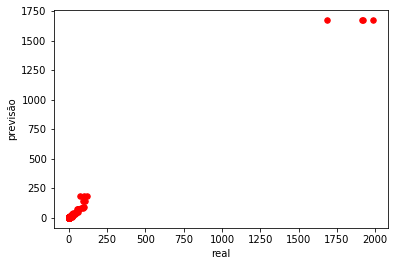

In [167]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [168]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,8.22292
std,99.52253,89.15509
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,2.00000
max,1986.00000,1673.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	8.22292
* std 	99.52253 	89.15509
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	2.00000 	2.00000
* max 	1986.00000 	1673.00000

In [169]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [170]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Sem Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Sem Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.12439
MSE,44.75681,172.75611
RMSE,6.69005,13.14367
MAE,0.47729,1.24808
MAPE,6.72089,inf


#### Erro Treino
*  	Baseline 	Regressão Linear ScikitLearn
* Base Teste 		
* VIÉS 	0.40601 	0.12439
* MSE 	44.75681 	172.75611
* RMSE 	6.69005 	13.14367
* MAE 	0.47729 	1.24808
* MAPE 	6.72089 	inf

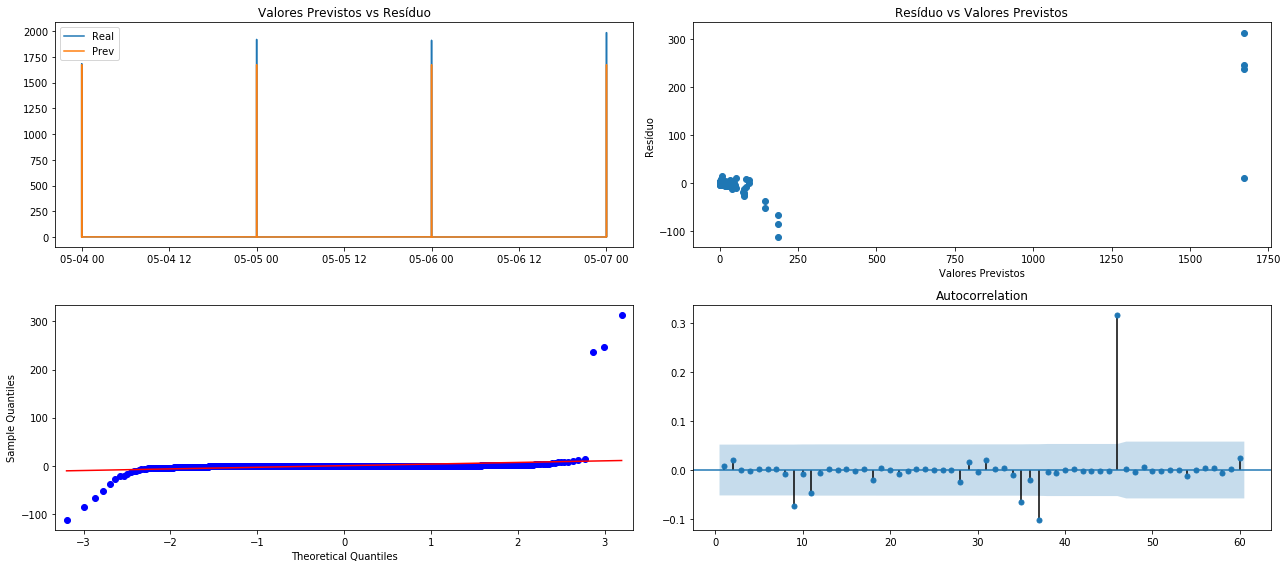

In [171]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a árvore de decisão sem modificação da distribuição target teve desempenho pior que a baseline. O erro médio absoluto foi de 1.24 mortes, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior). A principal causa são os outliers da capital, como dão a entender o RMSE e o gráfico de dispersão.


##### Com modificação da distribuição target

In [172]:
tree = DecisionTreeRegressor(criterion='mae', random_state=14)
tree.fit(x_treino2,y_treino2log)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=14, splitter='best')

In [173]:
y_pred1 = tree.predict(x_treino2)
y_pred1 = pd.DataFrame(y_pred1, columns=['previsão'])
y_pred1 = np.expm1(y_pred1).round(decimals=0)

In [174]:
df_mortes_TREE_treino = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_treino = df_mortes_TREE_treino.iloc[0:7364]
df_mortes_TREE_treino = pd.concat([df_mortes_TREE_treino,y_pred1], axis=1, join='inner')
df_mortes_TREE_treino.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_treino.rename(columns=colunas, inplace=True)
df_mortes_TREE_treino

,real,previsão
data,,
2020-02-26,0,0.00000
2020-02-27,0,0.00000
2020-02-28,0,0.00000
2020-02-29,0,0.00000
2020-03-01,0,0.00000
...,...,...
2020-05-03,2,2.00000
2020-05-03,1,1.00000
2020-05-03,0,0.00000


Text(0, 0.5, 'previsão')

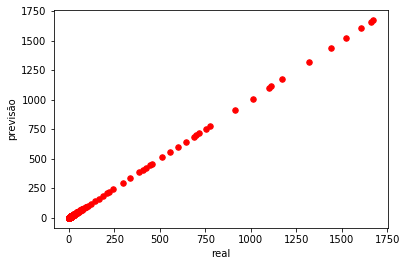

In [175]:
plt.scatter(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [176]:
df_mortes_TREE_treino.describe()

,real,previsão
count,7364.00000,7364.00000
mean,4.98669,4.98669
std,58.68772,58.68772
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,1.00000,1.00000
max,1673.00000,1673.00000


*  	real 	previsão
* count 	7364.00000 	7364.00000
* mean 	4.98669 	4.98669
* std 	58.68772 	58.68772
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	1.00000 	1.00000
* max 	1673.00000 	1673.00000

In [177]:
df_mortes_TREE_treino[df_mortes_TREE_treino['previsão'] < 0]

,real,previsão
data,,


Regressão linear sem polinômio:
* sem previsões negativas

In [178]:
df_mortes_baseline_treino = df_mortes.iloc[0:7364]
erro_treino = check_erro(df_mortes_baseline_treino['real'].values,
                         df_mortes_baseline_treino['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Treino')
erro_treino['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_treino['real'], df_mortes_TREE_treino['previsão'])
erro_treino

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Treino,,
VIÉS,0.35646,0.00000
MSE,16.43061,0.00000
RMSE,4.05347,0.00000
MAE,0.36353,0.00000
MAPE,9.64655,0.00000


#### Erro Treino
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Treino 		
* VIÉS 	0.35646 	0.00000
* MSE 	16.43061 	0.00000
* RMSE 	4.05347 	0.00000
* MAE 	0.36353 	0.00000
* MAPE 	9.64655 	0.00000

C:\Users\gusta\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:578: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


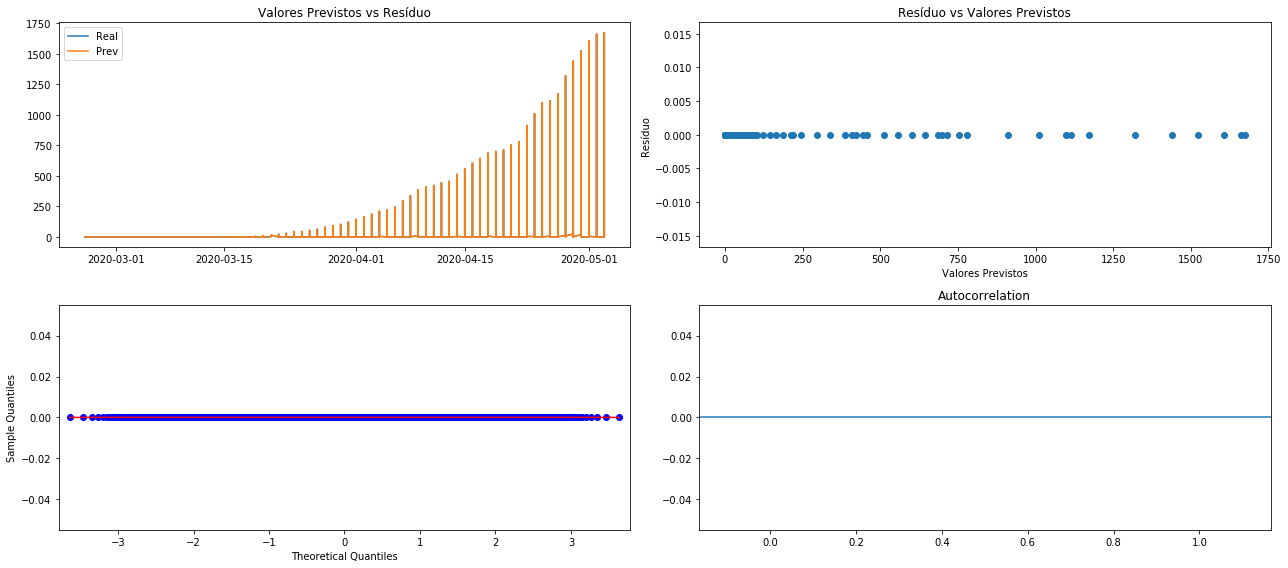

In [179]:
plotar_erro(df_mortes_TREE_treino)

Com a base treino, a árvore de decisão com modificação da distribuição target deu overfit total, com 0 erros.

In [180]:
y_pred2 = tree.predict(x_teste2)
y_pred2 = pd.DataFrame(y_pred2, columns=['previsão'])
y_pred2 = np.expm1(y_pred2).round(decimals=0)

In [181]:
df_mortes_TREE_teste = dados_tratados[['data', 'mortes_acumuladas']].copy()
df_mortes_TREE_teste = df_mortes_TREE_teste.iloc[7364:]
df_mortes_TREE_teste.reset_index(drop=True, inplace=True)
df_mortes_TREE_teste = pd.concat([df_mortes_TREE_teste,y_pred2], axis=1, join='inner')
df_mortes_TREE_teste.set_index('data', inplace=True)
colunas = {'mortes_acumuladas': 'real'}
df_mortes_TREE_teste.rename(columns=colunas, inplace=True)
df_mortes_TREE_teste

,real,previsão
data,,
2020-05-04,0,0.00000
2020-05-04,0,0.00000
2020-05-04,11,13.00000
2020-05-04,3,3.00000
2020-05-04,1,1.00000
...,...,...
2020-05-07,0,0.00000
2020-05-07,0,0.00000
2020-05-07,2,3.00000


Text(0, 0.5, 'previsão')

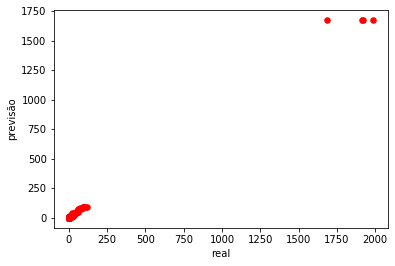

In [182]:
plt.scatter(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'], s = 30, c = 'red')
plt.xlabel("real")
plt.ylabel("previsão")

In [183]:
df_mortes_TREE_teste.describe()

,real,previsão
count,1431.00000,1431.00000
mean,8.34731,7.87771
std,99.52253,88.73254
min,0.00000,0.00000
25%,0.00000,0.00000
50%,0.00000,0.00000
75%,2.00000,2.00000
max,1986.00000,1673.00000


*  	real 	previsão
* count 	1431.00000 	1431.00000
* mean 	8.34731 	7.87771
* std 	99.52253 	88.73254
* min 	0.00000 	0.00000
* 25% 	0.00000 	0.00000
* 50% 	0.00000 	0.00000
* 75% 	2.00000 	2.00000
* max 	1986.00000 	1673.00000

In [184]:
df_mortes_TREE_teste[df_mortes_TREE_teste['previsão'] < 0]

,real,previsão
data,,


* sem previsões negativas.

In [185]:
df_mortes_baseline_teste = df_mortes.iloc[7364:]
erro_teste = check_erro(df_mortes_baseline_teste['real'].values,
                         df_mortes_baseline_teste['previsão'],
                         nome_col='Baseline',
                         nome_indice='Base Teste')
erro_teste['Árvore de Decisão Com Modificação da Distr. Target'] = check_erro(df_mortes_TREE_teste['real'], df_mortes_TREE_teste['previsão'])
erro_teste

,Baseline,Árvore de Decisão Com Modificação da Distr. Target
Base Teste,,
VIÉS,0.40601,0.46960
MSE,44.75681,153.15164
RMSE,6.69005,12.37545
MAE,0.47729,1.03424
MAPE,6.72089,inf


#### Erro Teste
*  	Baseline 	Árvore de Decisão Com Modificação da Distr. Target
* Base Teste 		
* VIÉS 	0.40601 	0.46960
* MSE 	44.75681 	153.15164
* RMSE 	6.69005 	12.37545
* MAE 	0.47729 	1.03424
* MAPE 	6.72089 	inf

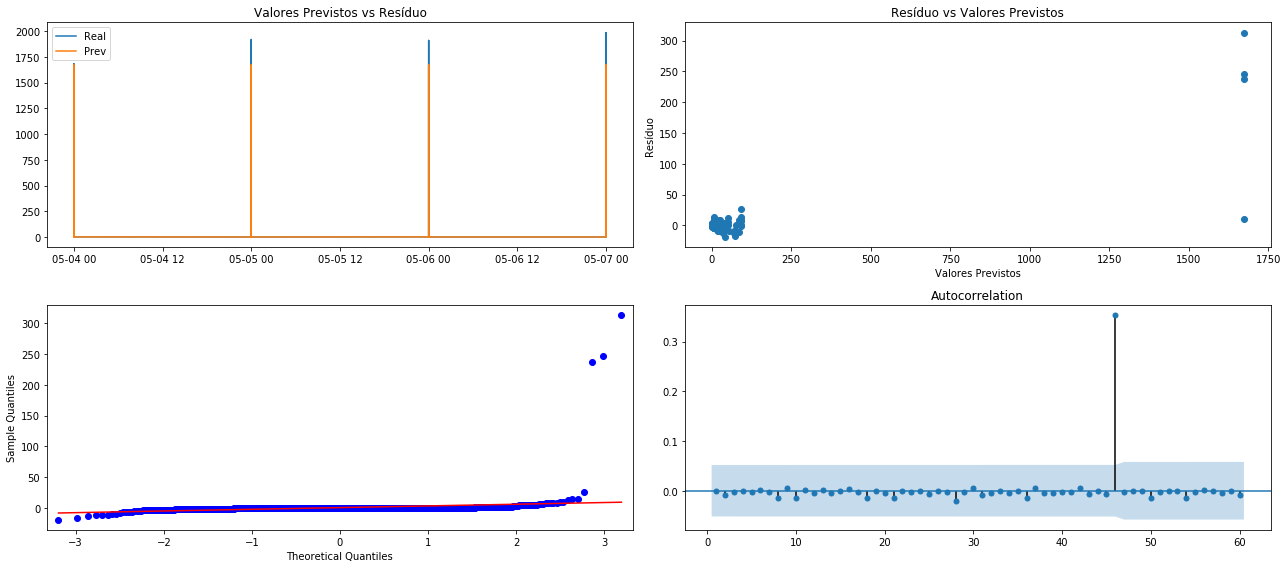

In [186]:
plotar_erro(df_mortes_TREE_teste)

Com a base teste, a árvore de decisão com modificação da distribuição target teve desempenho pior que a baseline. O erro médio absoluto foi de 1.03 mortes, contra 0.47 mortes na baseline (que apenas repete o resultado do dia anterior). Em comparação com a árvore sem modificação da distribuição target, vemos que o erro médio absoluto caiu (canto inferior do gráfico de dispersão), assim como o RMSE.
